<b><font color="red" size="6">ch13. 데이터 시각화</font></b>

In [1]:
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
# plt.rc('font', family = 'AppleGothic') Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 3절. Seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    * 공식사이트 : https://seaborn.pydata.org
    * seaborn API : https://seaborn.pydata.org/api.html
- seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
    1) 데이터준비 <br>
    2) 미적속성 설정 <br>
    3) 함수를 이용하여 그래프 그리기(관계형-수치형, 범주형, 쌍관계, 밀도, 회귀,...)<br>
    4) 그래프 출력(show), 저장(savefig)

## 3.1 데이터 준비하기
- iris, titanic

In [2]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [3]:
iris.info() # dtype, 전체행수, 열별결측치를 제외한 데이터수, 메모리 사용량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 열별 결측치 수
iris.isna().sum()
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris['species'].unique() # 범주형 데이터들

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
iris['species'].value_counts() # unique 범주형 데이터의 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
"""
1. survived 생존 여부 0이면 사망, 1이면 생존
2. pclass 객실 등급 1이면 1등급, 2이면 2등급, 3이면 3등급
3. sex 성별 male이면 남자, female이면 여자
4. age 나이
5. sibsp 함께 탑승한 형제 및 배우자 수
6. parch 함께 탑승한 자녀 및 부모 수
7. fare 요금
8. embarked 탑승지 이름 앞글자 C는 Cherbourg, Q는 Queenstown, S는 Southampton
9. class 객실 등급 First면 1등급, Second면 2등급, Third면 3등급
10. who 남자, 여자, 아이 man, woman, child
11. adult_male 성인 남자인지 여부 True면 성인 남자, False면 그외
12. deck 선실 번호 첫 알파벳 A, B, C, D, E, F, G
13. embark_town 탑승지 이름 Cherbourg, Queenstown, Southampton
14. alive 생존여부 no면 사망, yes면 생존
15. alone 혼자 탑승했는지 여부 True면 혼자 탑승, False면 가족과 함께 탑승
"""
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 3.2 미적 속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 스타일 지정
- 폰트 초기화로 한글설정과 같이 함수 사용
    * plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
    * plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

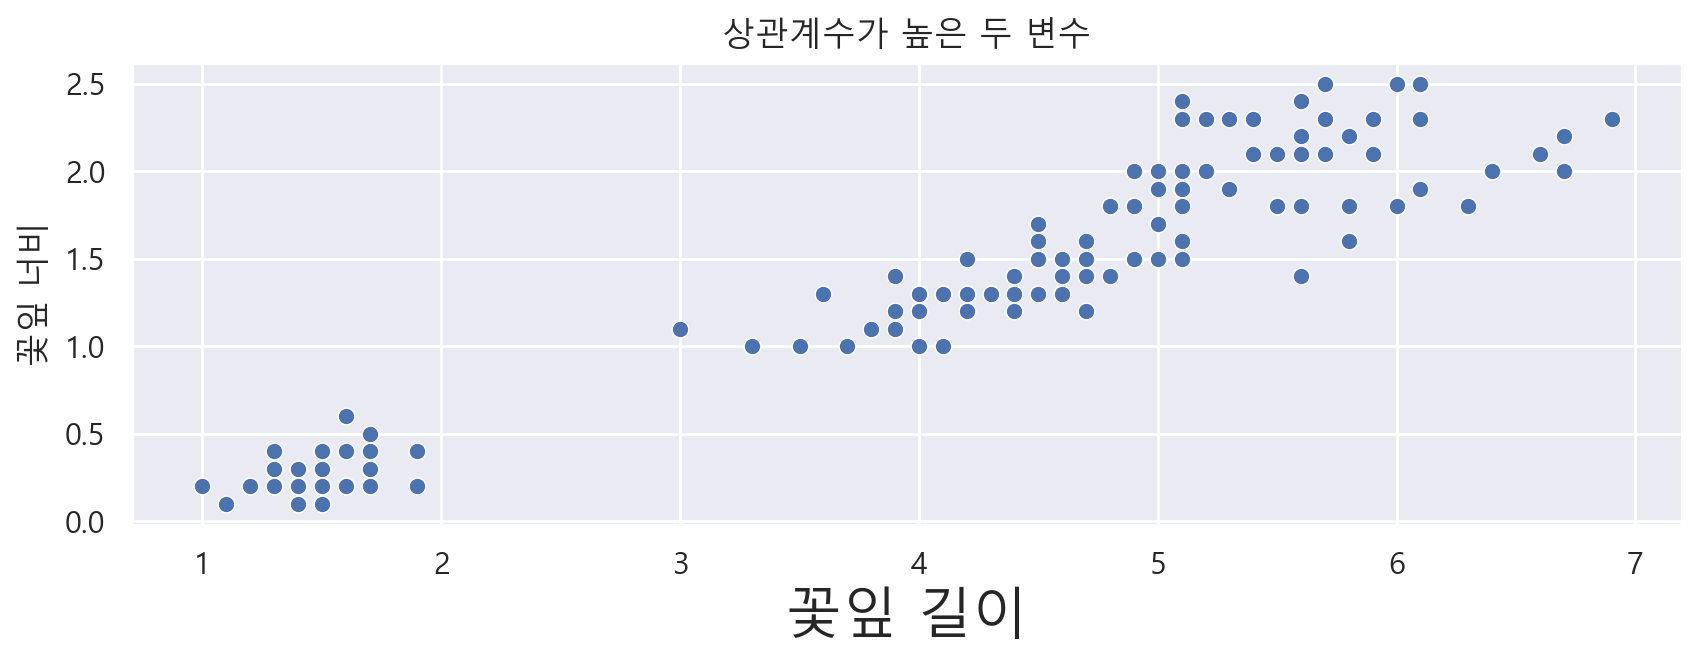

In [9]:
plt.figure(figsize=(10,3))
sns.set(style='darkgrid') # darkgrid, whitegrid, dark, ticks
# sns.set함수를 수행하면 기존의 설정이 초기화
plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width')
ax.set(title='상관계수가 높은 두 변수', ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', fontsize=20)
plt.show()

### 2)컨텍스트 지정(배율)

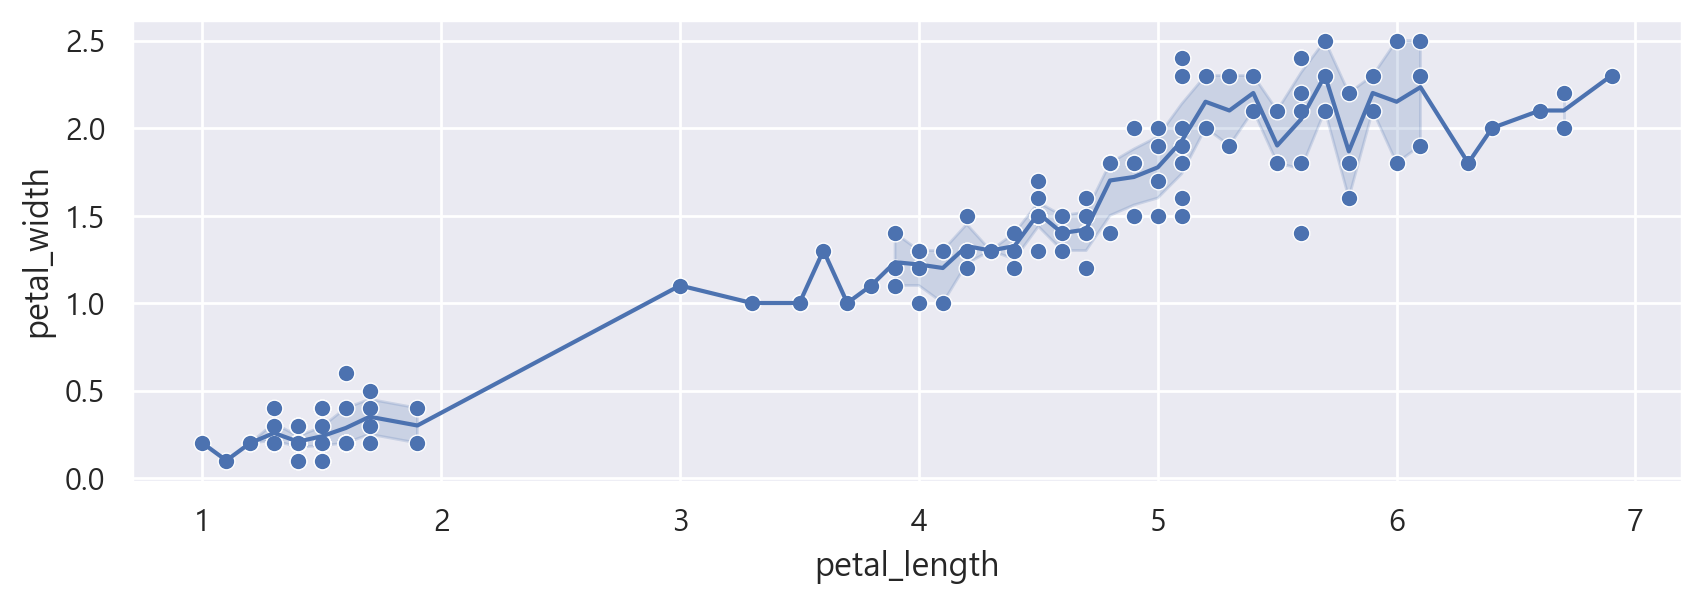

In [10]:
plt.figure(figsize=(10,3))
# sns.set(context='notebook') # 기본값(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
sns.lineplot(data=iris, x='petal_length', y='petal_width')
sns.scatterplot(data=iris, x='petal_length', y='petal_width')
plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

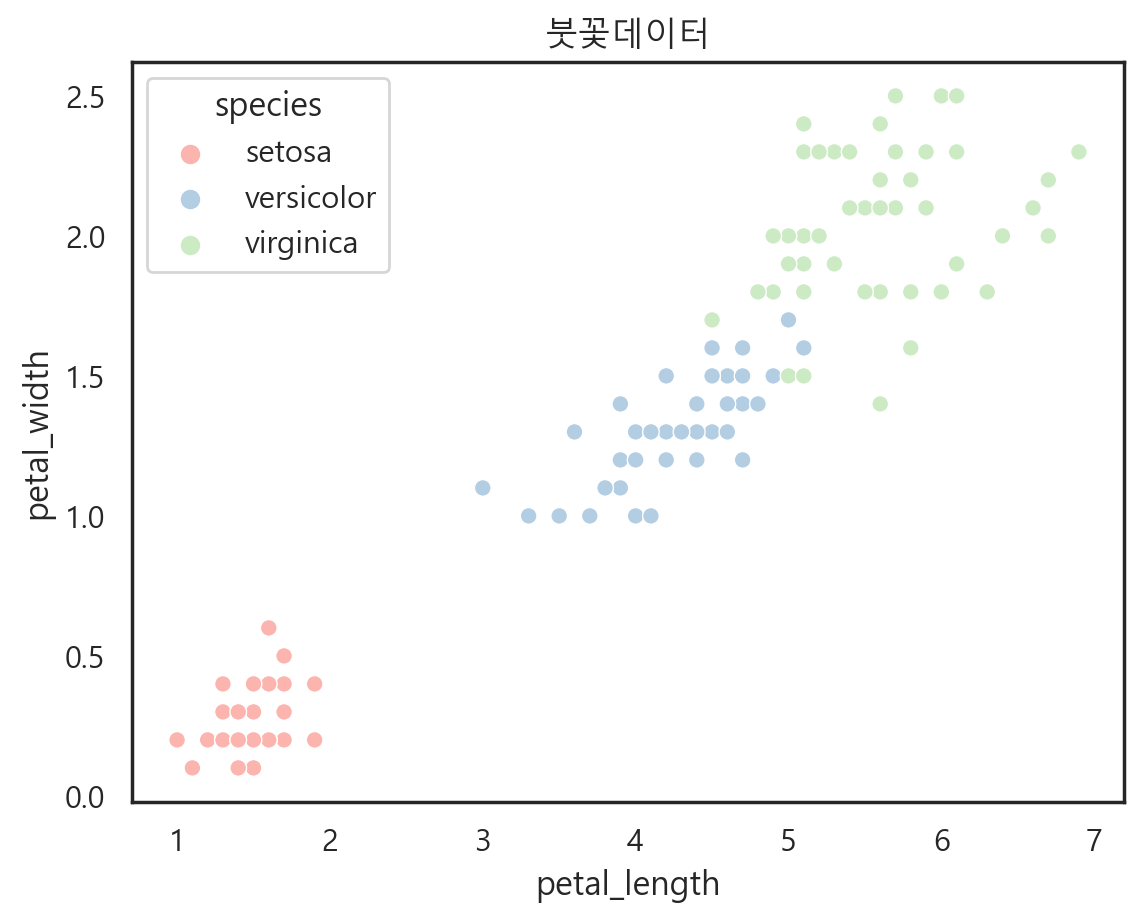

In [11]:
sns.set(palette = 'Pastel1', style='white', context='notebook')
plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set_title('붓꽃데이터')
plt.show()

In [20]:
sns.set(style='darkgrid',
        context='notebook',
        palette='Dark2',
        rc={'figure.figsize':(10,3)})
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 3.3 Seaborn함수로 그래프 그리기
### 1) 관계형 그래프
    * scatterplot, lineplot, relplot(서브플롯제공)

<Axes: xlabel='petal_length', ylabel='petal_width'>

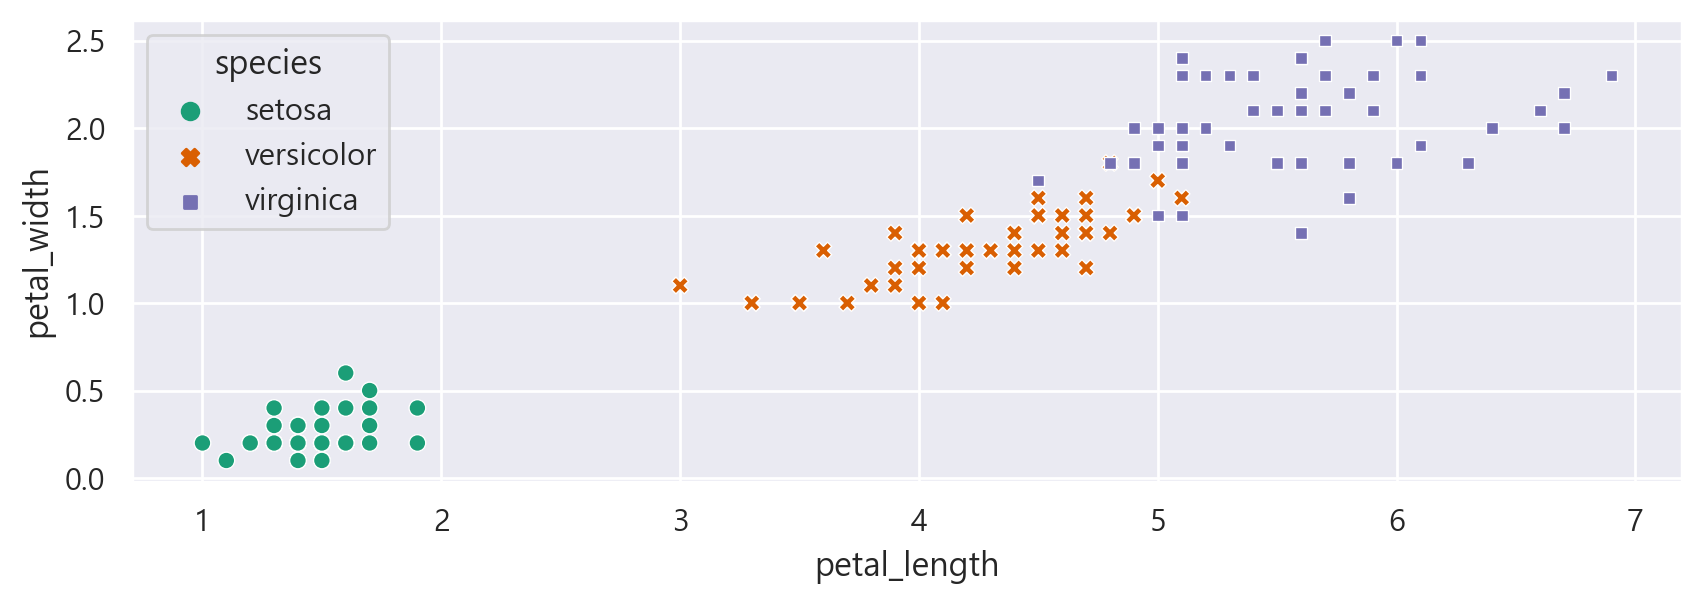

In [25]:
# 종별 다른 색상과 다른 스타일의 scatterplot
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Dark2', style='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

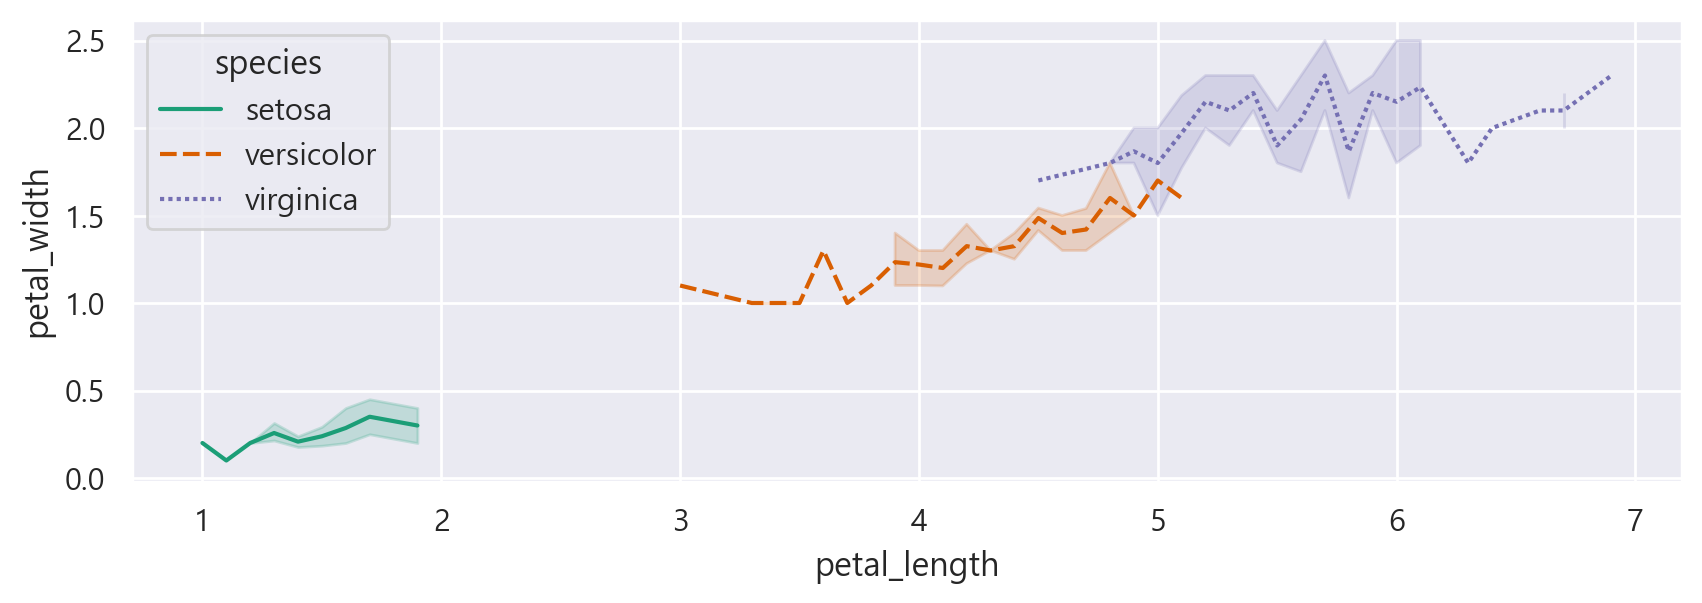

In [23]:
# 종별 다른 색상과 스타일의 lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', style='species')

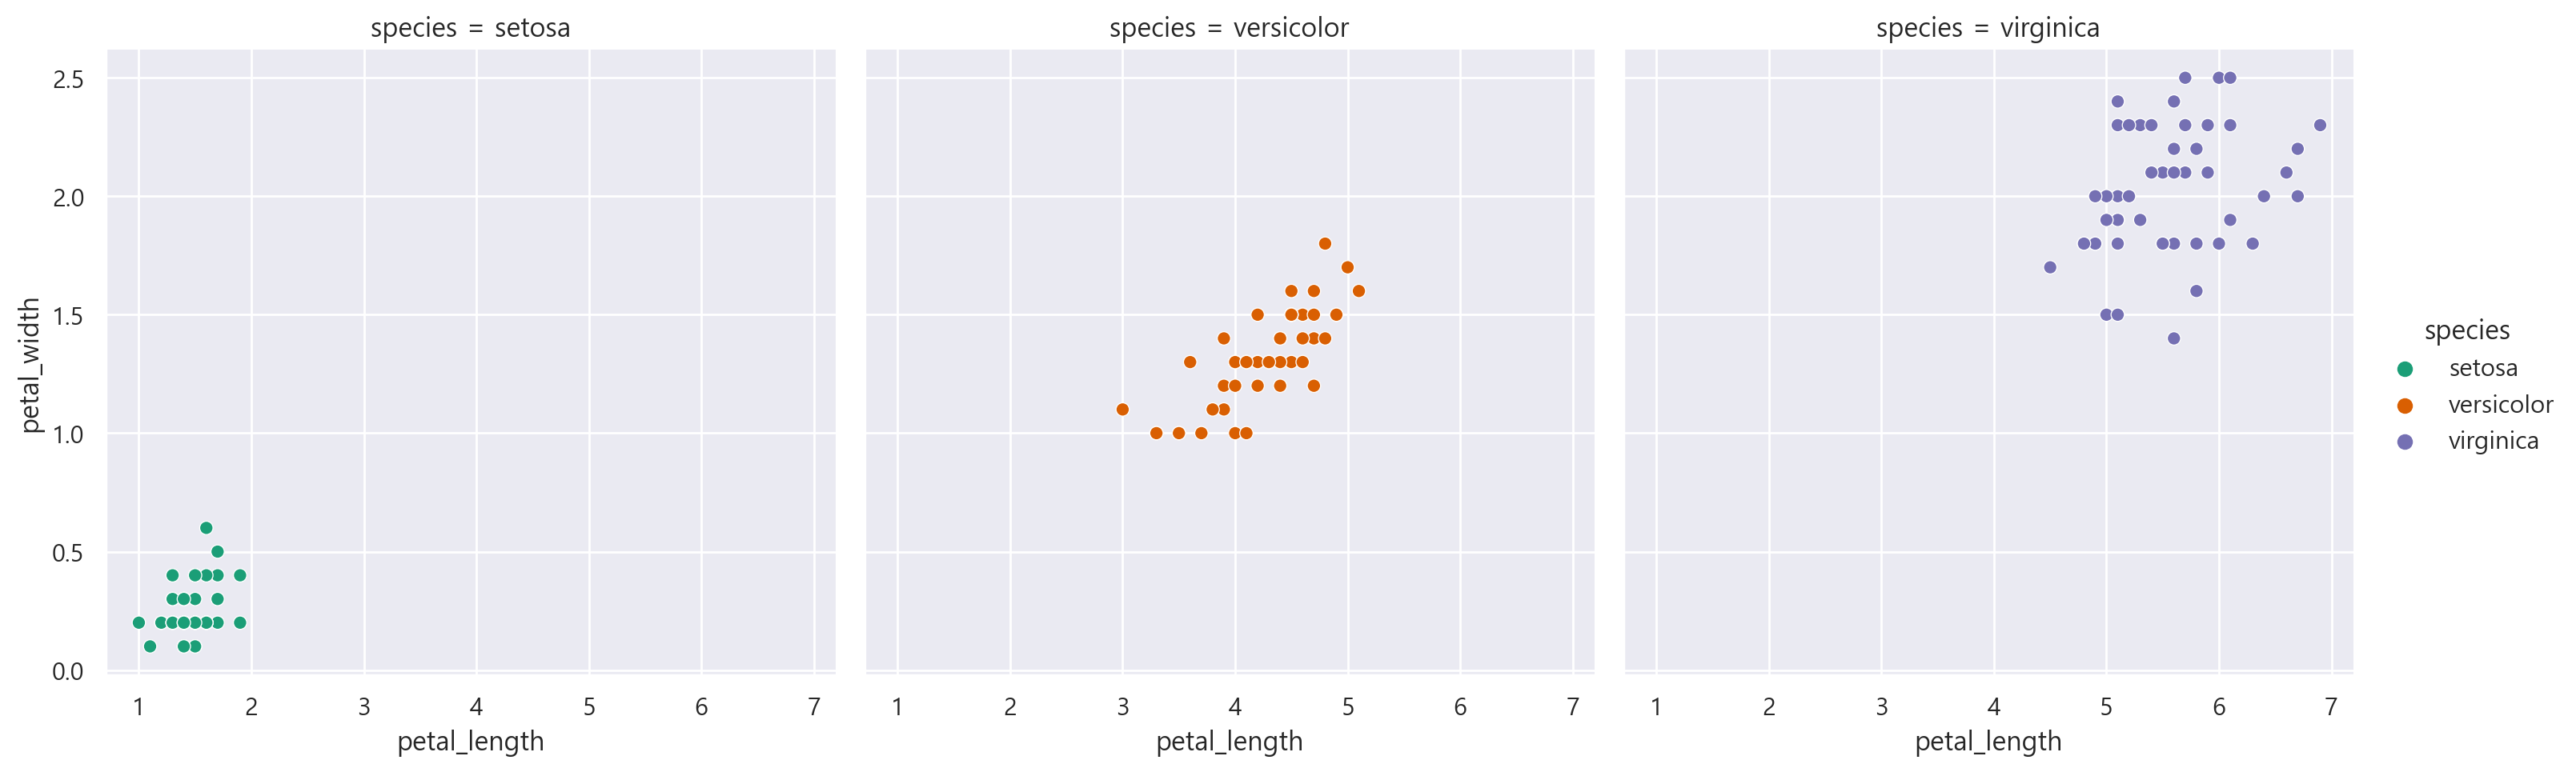

In [30]:
# lineplot을 종별 서브플롯으로 => relplot(관계형 그래프에서 서브플롯 그리는 함수)
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species', 
#             kind='line', # 서브플롯으로 그려질 그래프 종류(기본값:scatter)
            col='species', # col단위로 서브플롯 표현
#             col_wrap=2 # 한줄에 표현될 서브플로수
           )
plt.show()

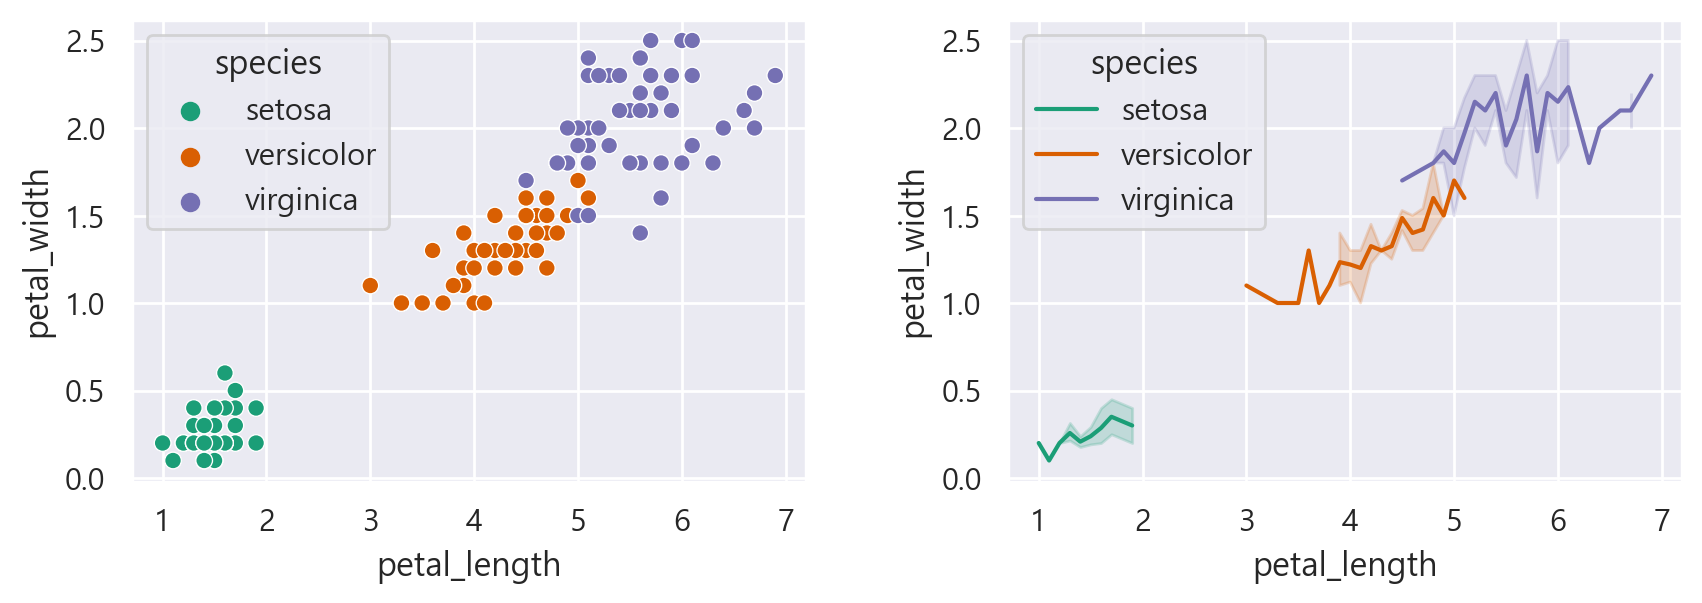

In [33]:
# ax[0]에는 산점도, ax[1]에는 lineplot
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=.3) # subplot사이에 공백조정
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot, swarmplot, barplot, barhplot, countplot, pointplot
- boxplot, violinplot boxenplot => catplot(서브플롯)

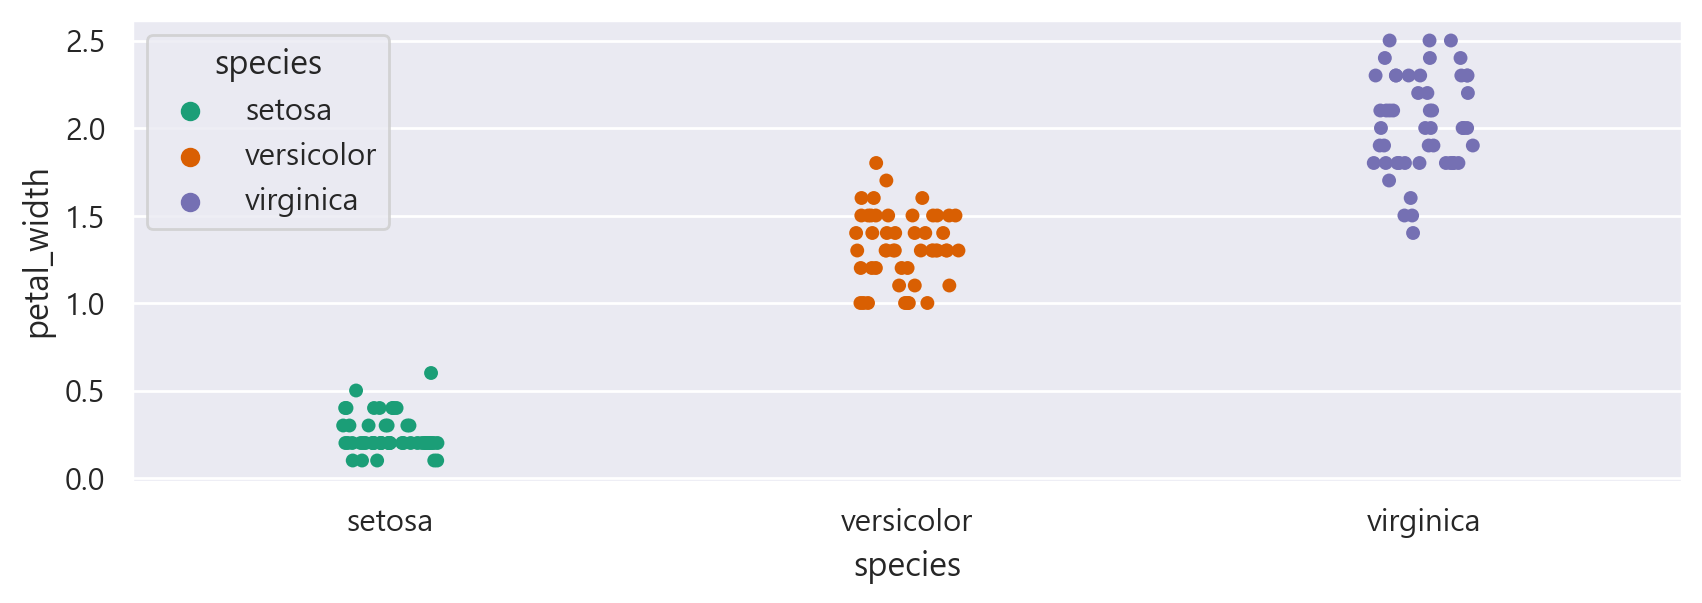

In [53]:
# x축이 범주형일떄의 산점도(중첩된 점)
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
# hue 속성이 있을경우 palette 가능
plt.show()

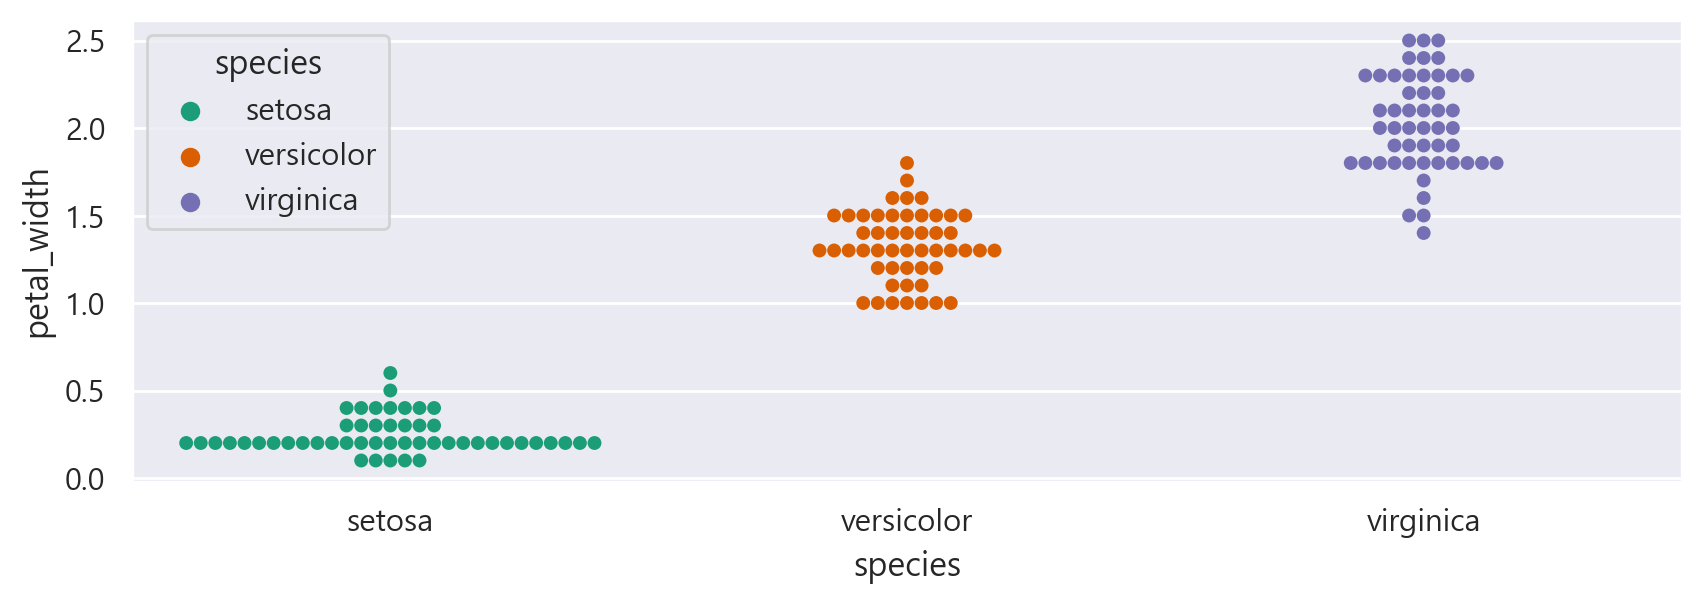

In [55]:
# x축이 범주형일떄의 산점도(중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

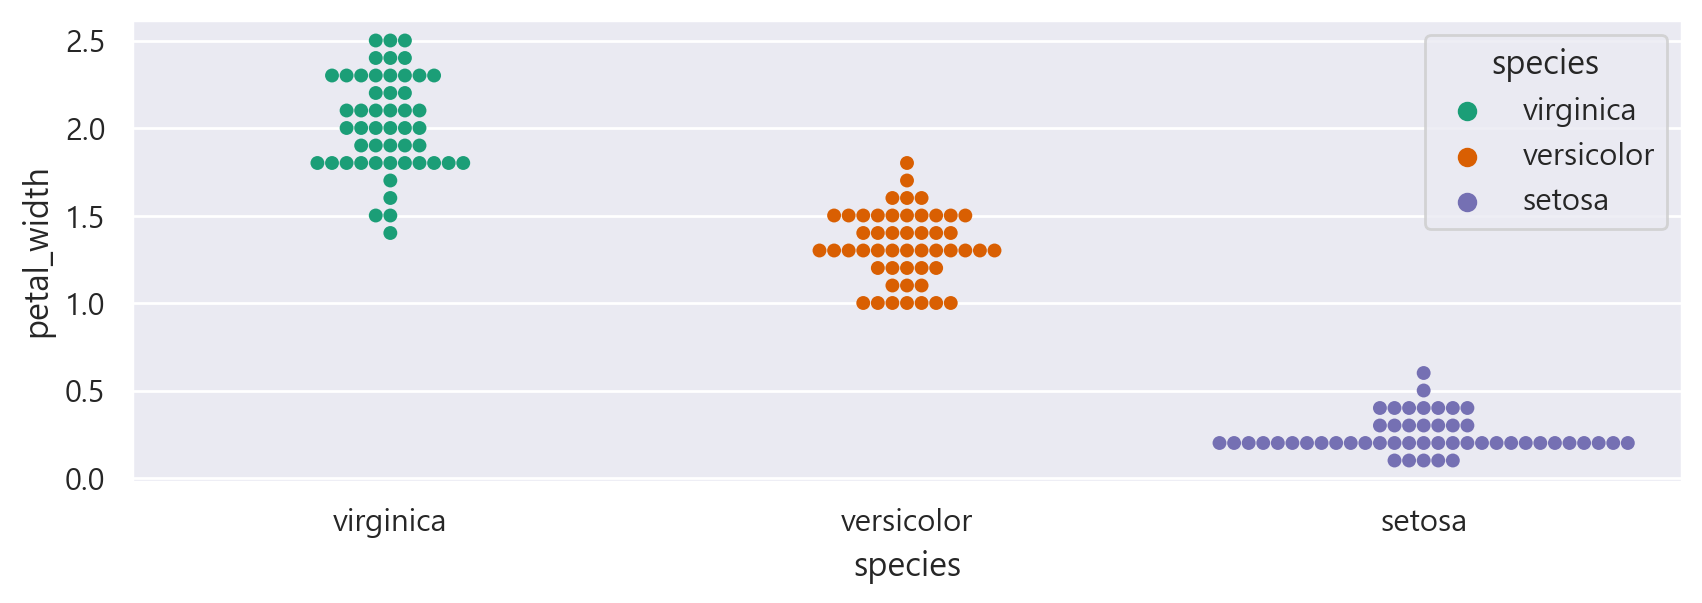

In [59]:
# 내림차순 정렬된 iris로 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False), 
              x='species', 
              y='petal_width', 
              hue='species')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

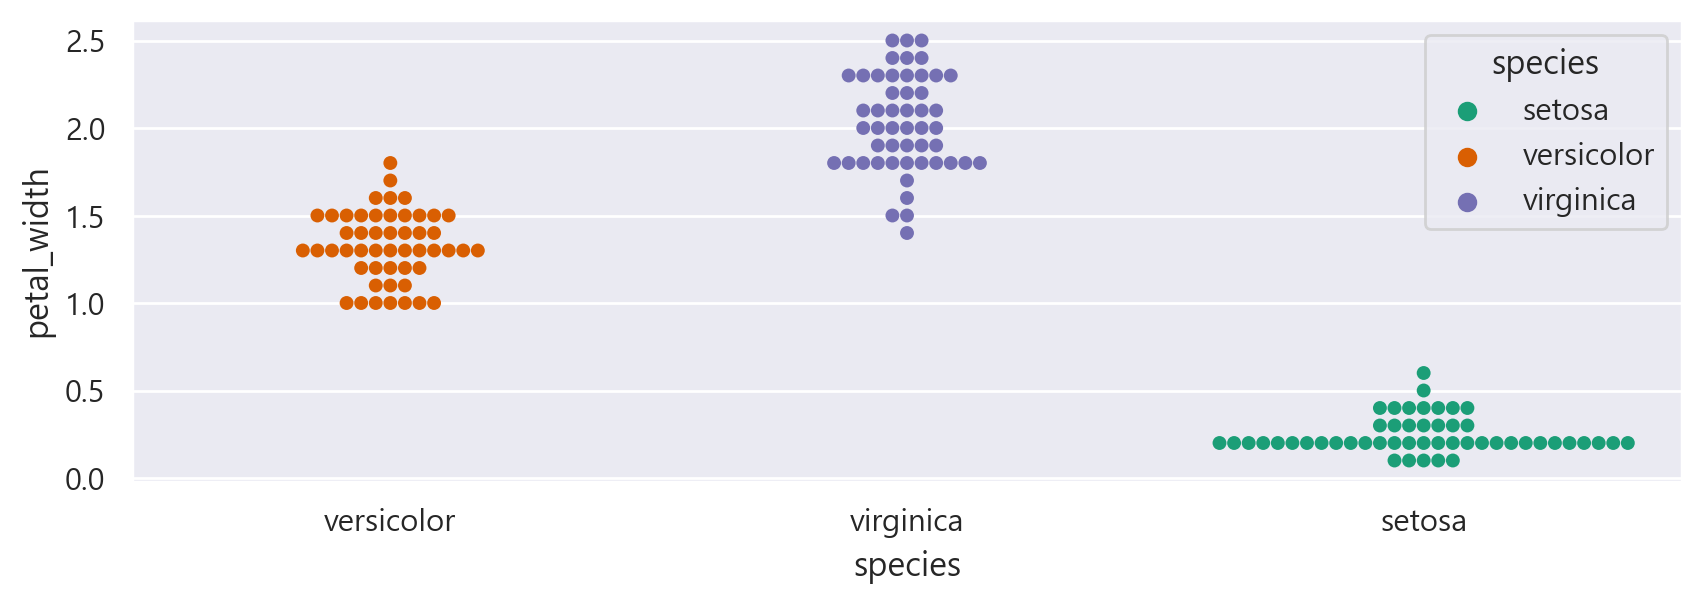

In [60]:
# 산점도의 x축 순서를 임의로 정할 수 있음
sns.swarmplot(data=iris, 
              x='species', 
              y='petal_width', 
              hue='species',
              order=['versicolor','virginica','setosa']
             )

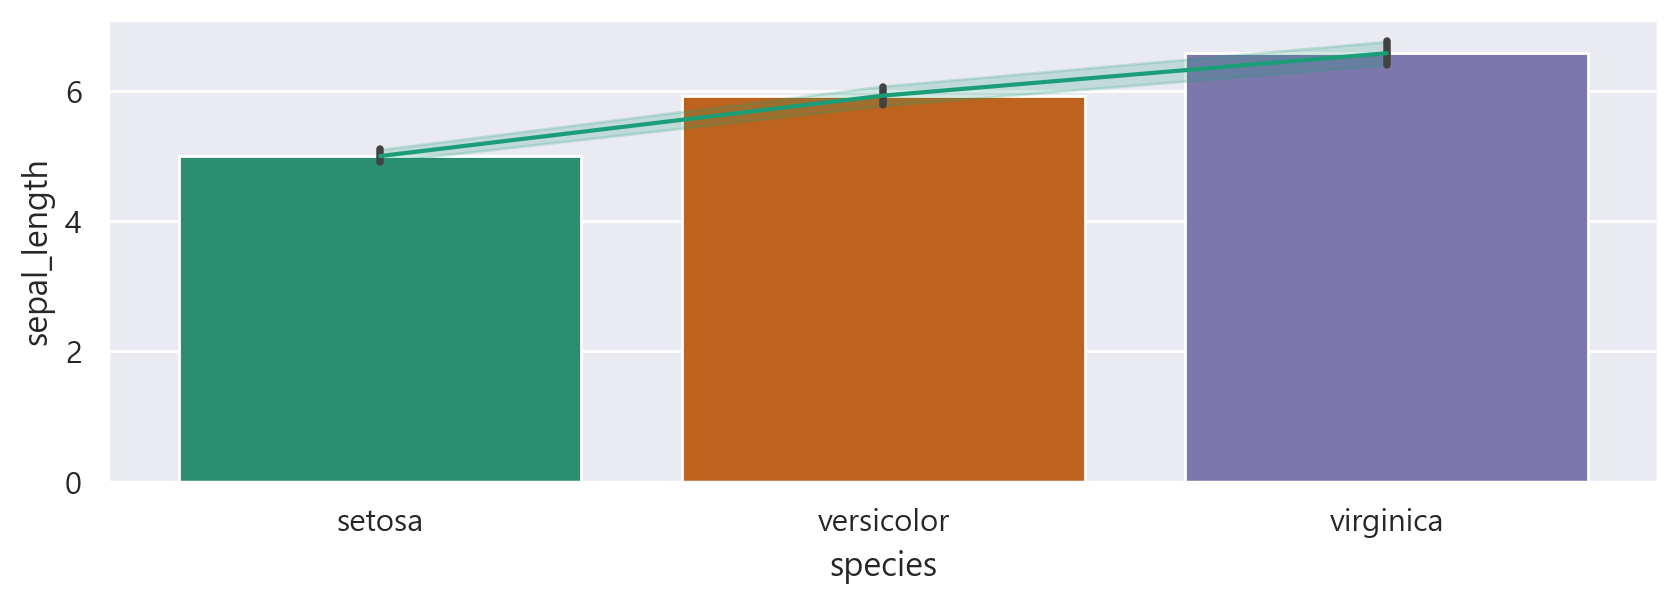

In [65]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간
#          신뢰구간 제외 : ci(confidence interval) = None, errorbar=None
sns.barplot(data=iris, x='species', y='sepal_length', 
#             errorbar=None
           )
sns.lineplot(data=iris, x='species', y='sepal_length')
plt.show()

<Axes: xlabel='sex', ylabel='survived'>

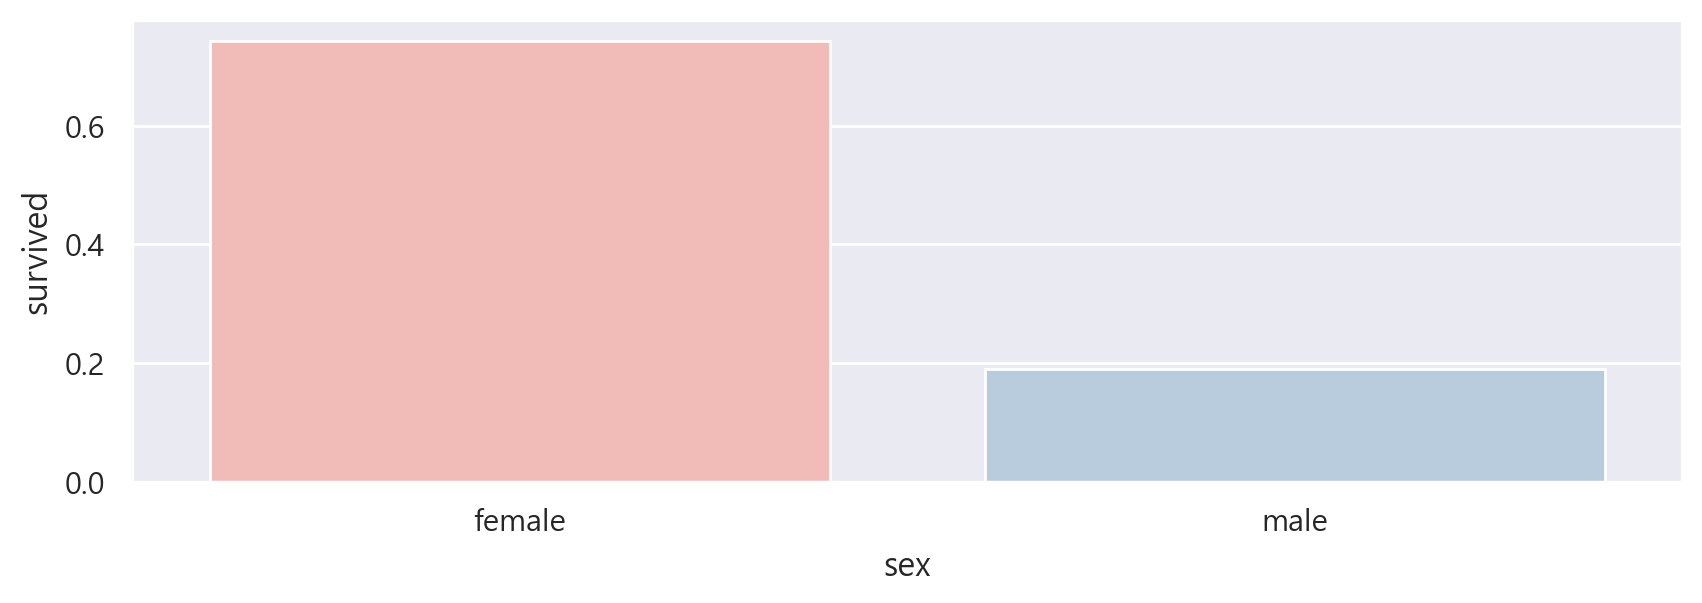

In [69]:
# 성별 servived의 평균을 막대그래프
sns.barplot(data=titanic, x='sex', y='survived',
            order=['female','male'],
            ci=None,
            palette='Pastel1'
           )

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


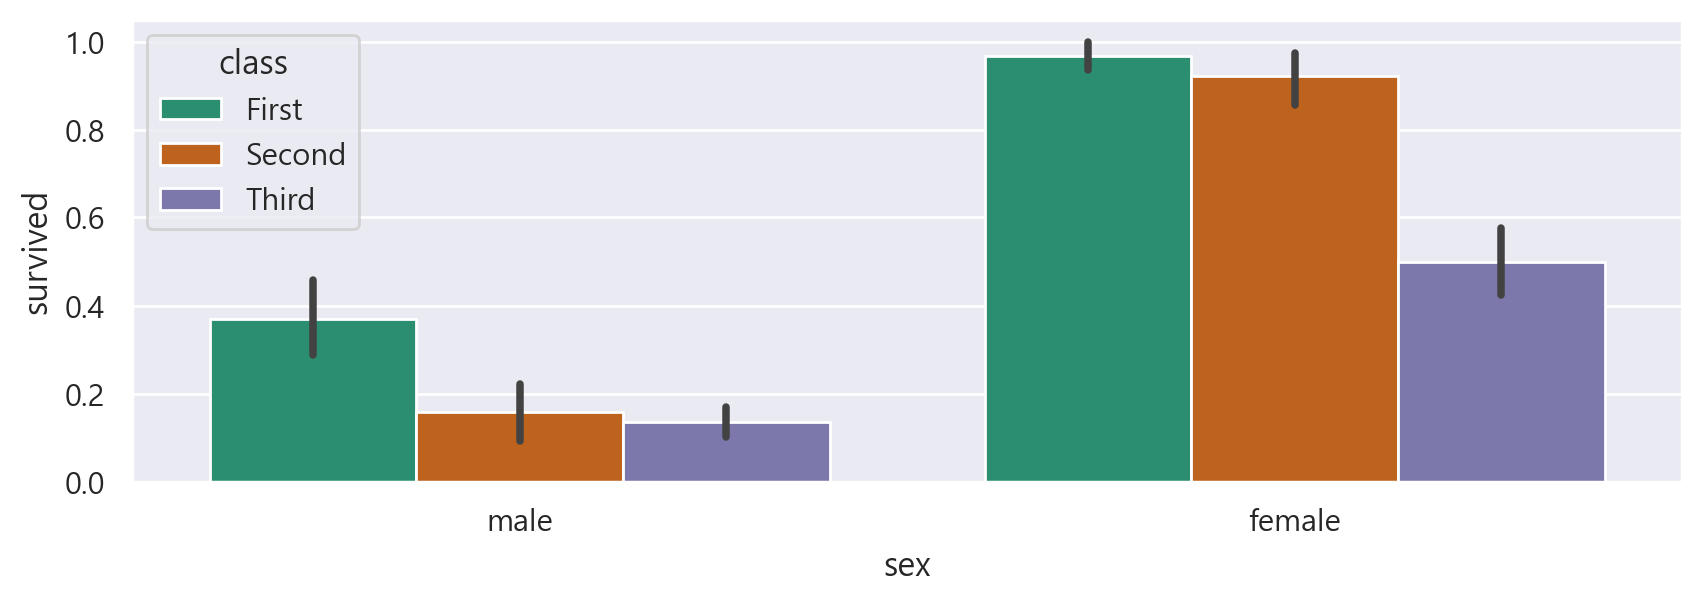

In [72]:
# class별로 성별 생존률을 하나의 막대그래프
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

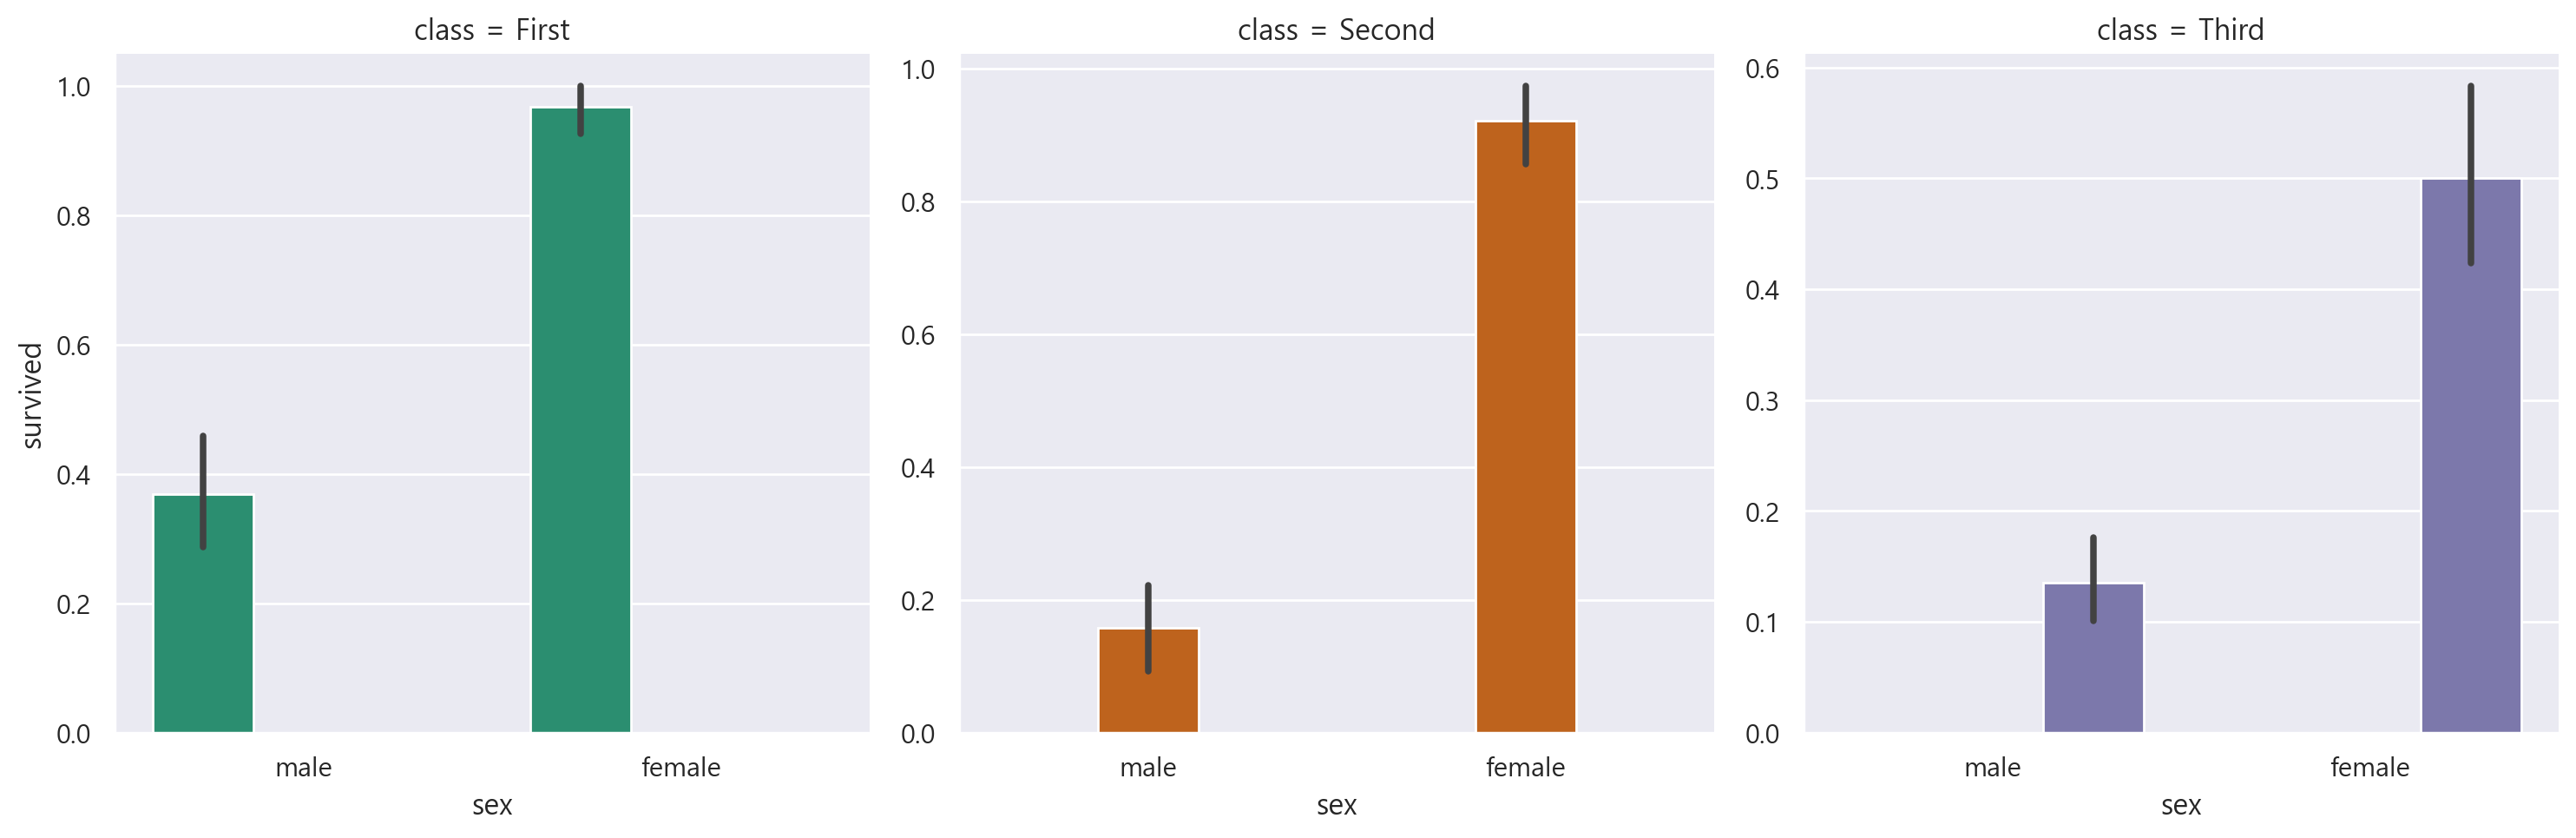

In [74]:
# class별로 성별 생존률을 서브플롯(막대그래프)
sns.catplot(data=titanic, x='sex', y='survived', hue='class',
            kind='bar',
            col='class', #col단위로 서브플롯 표현
            sharey=False, # y축 공유안함
#             col_wrap=2 기본값은 한행에 모든 서브플롯 표현
           )

In [75]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [76]:
titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [105]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='deck', ylabel='count'>

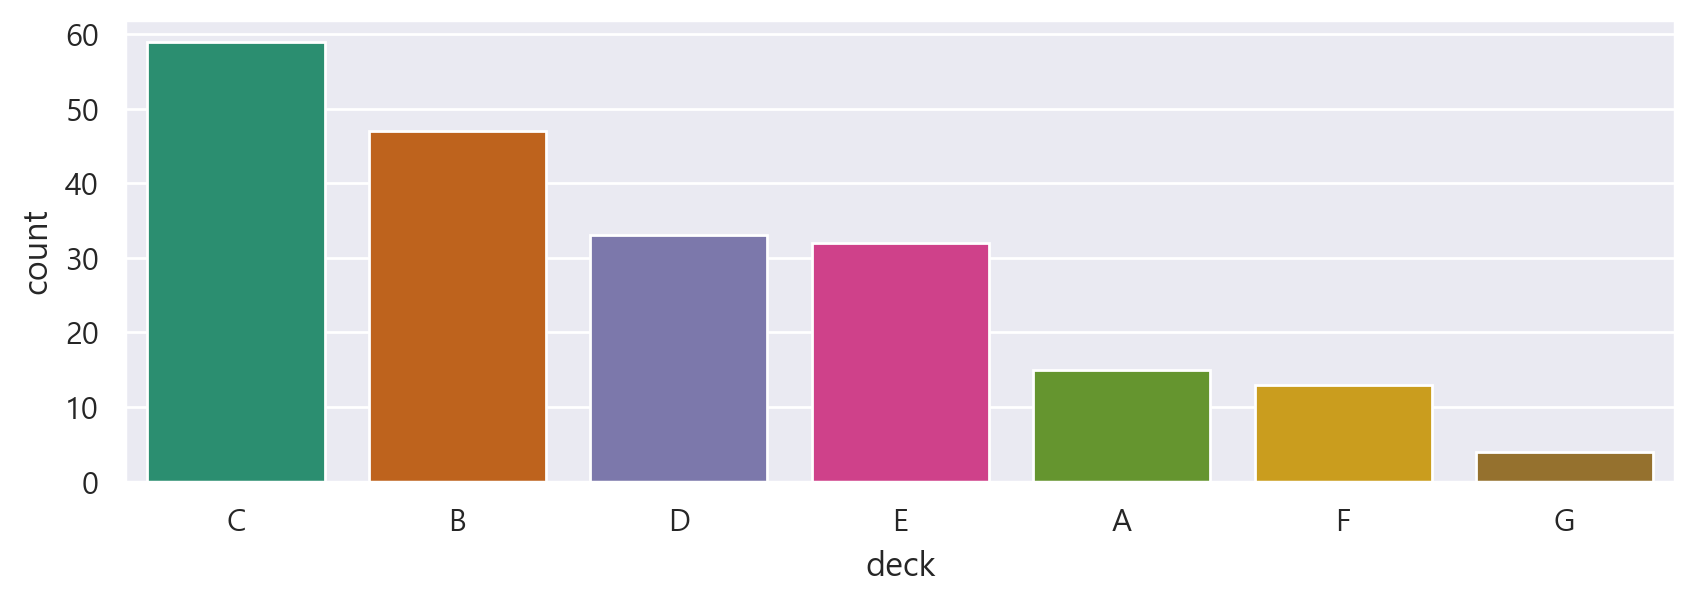

In [108]:
result = titanic.deck.value_counts()
# result.index
#deck 별 관측수(내림차순정렬)를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck', order = result.index)

<Axes: xlabel='deck', ylabel='count'>

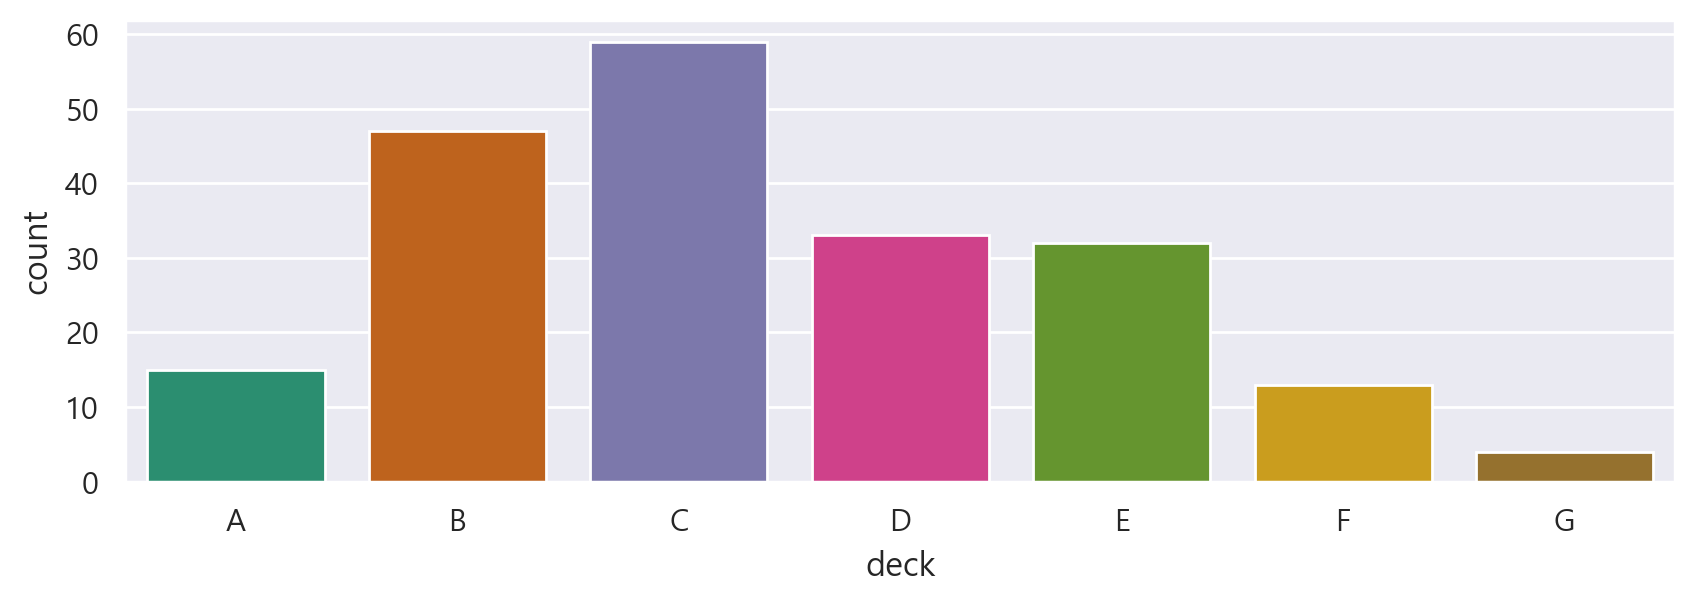

In [97]:
#deck 별 관측수를 막대그래프 (countplot)
sns.countplot(data=titanic, x='deck')

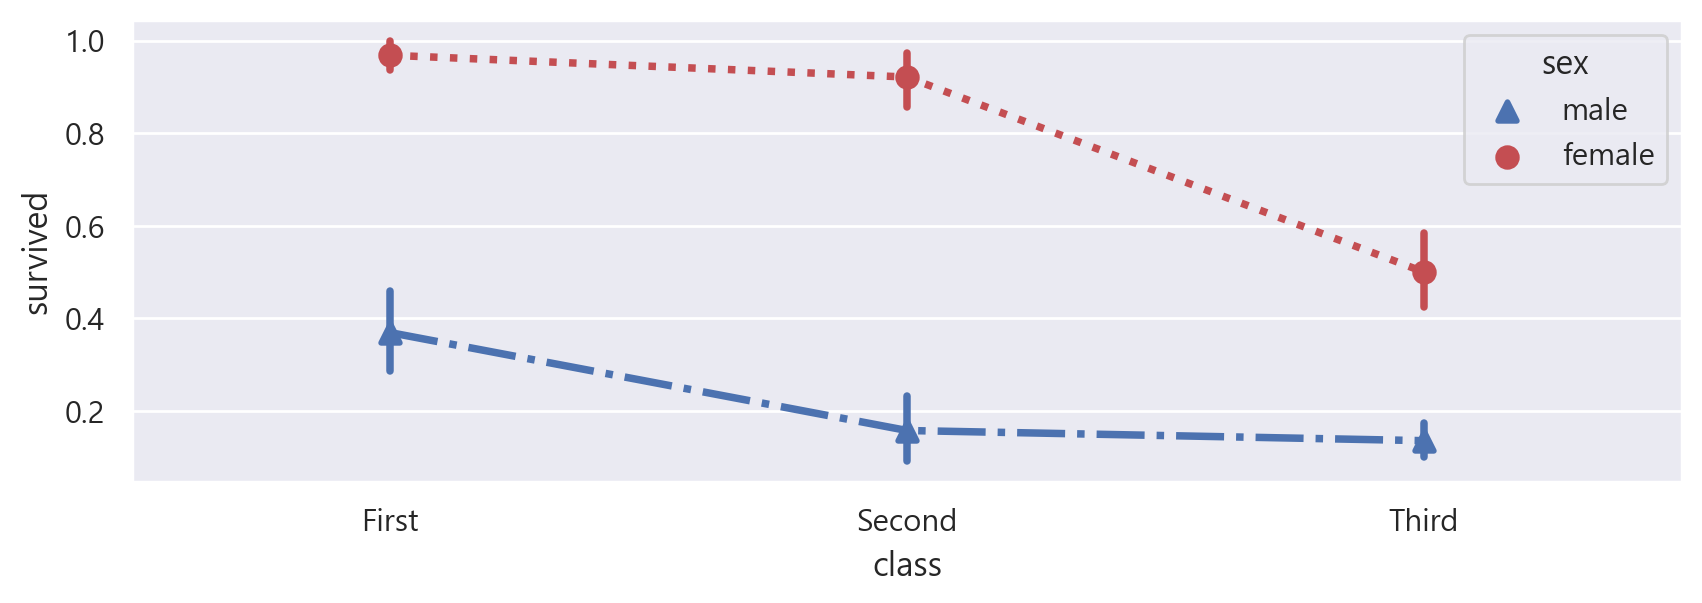

In [103]:
# class 별로 survived값을 pointplot
sns.pointplot(data=titanic, x='class', y='survived', hue='sex', markers=['^','o'],linestyles=['-.',':'], palette={'male':'b','female':'r'})
plt.show()

<Axes: xlabel='sex', ylabel='age'>

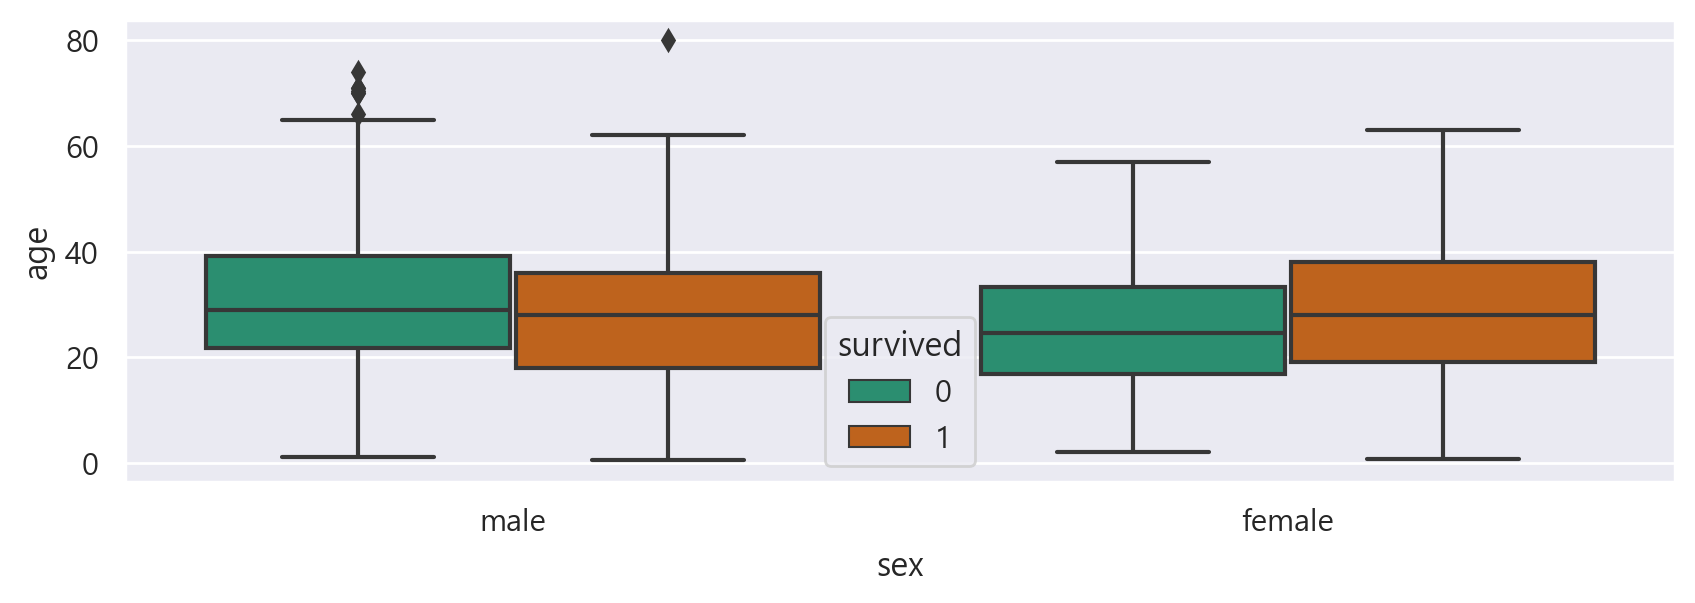

In [110]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

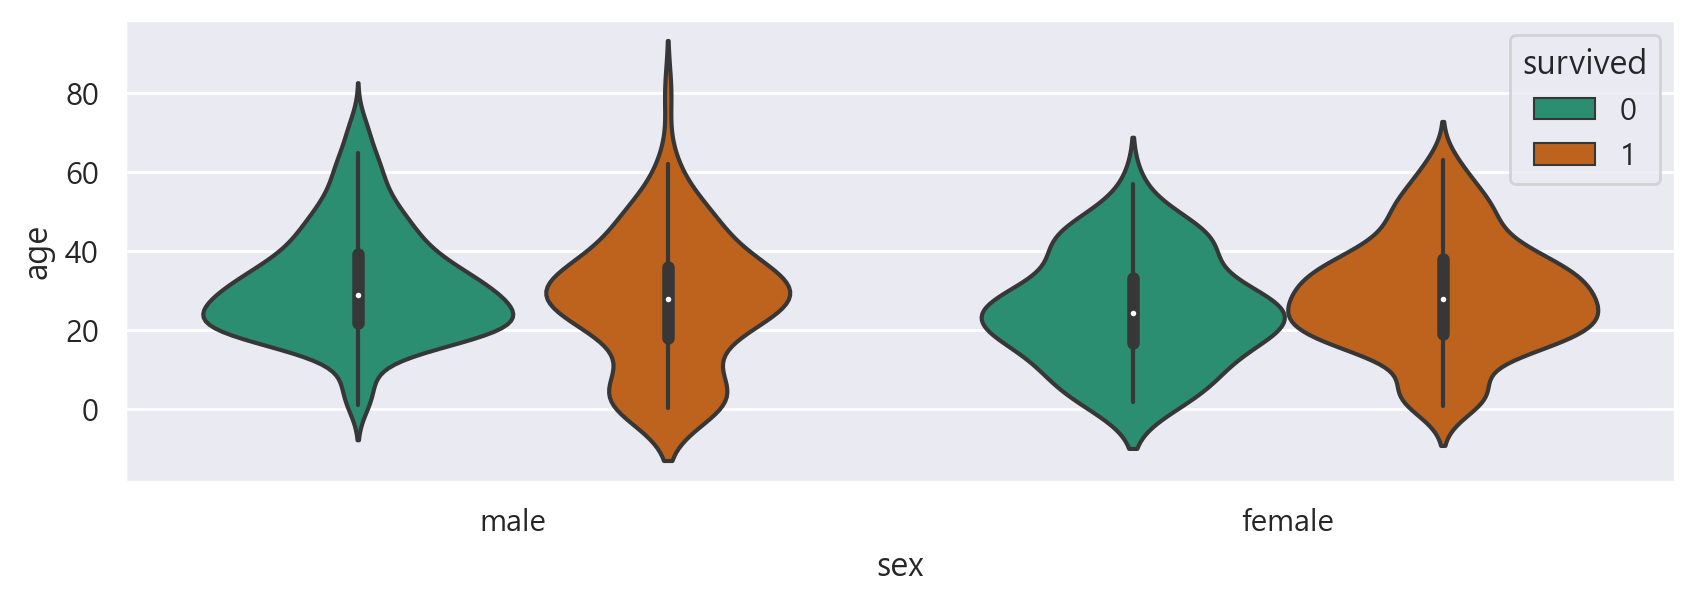

In [111]:
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

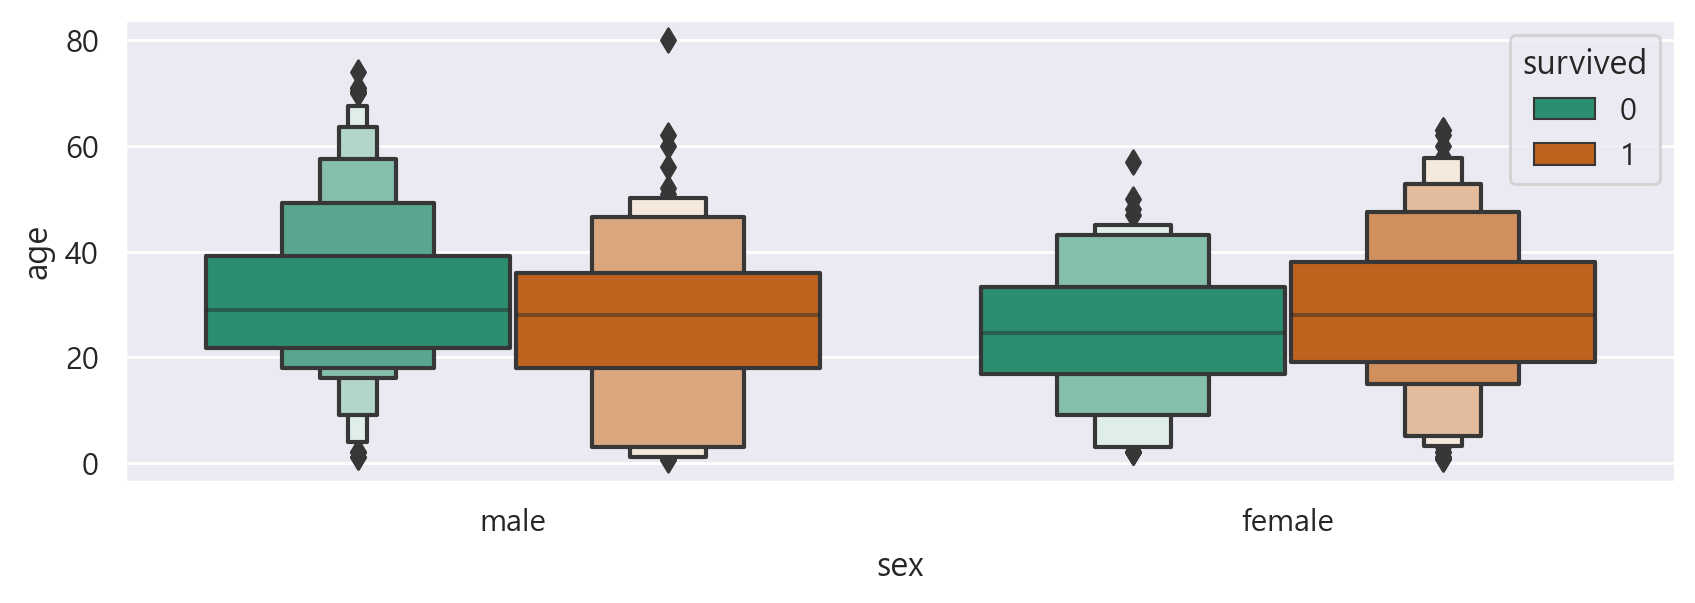

In [112]:
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

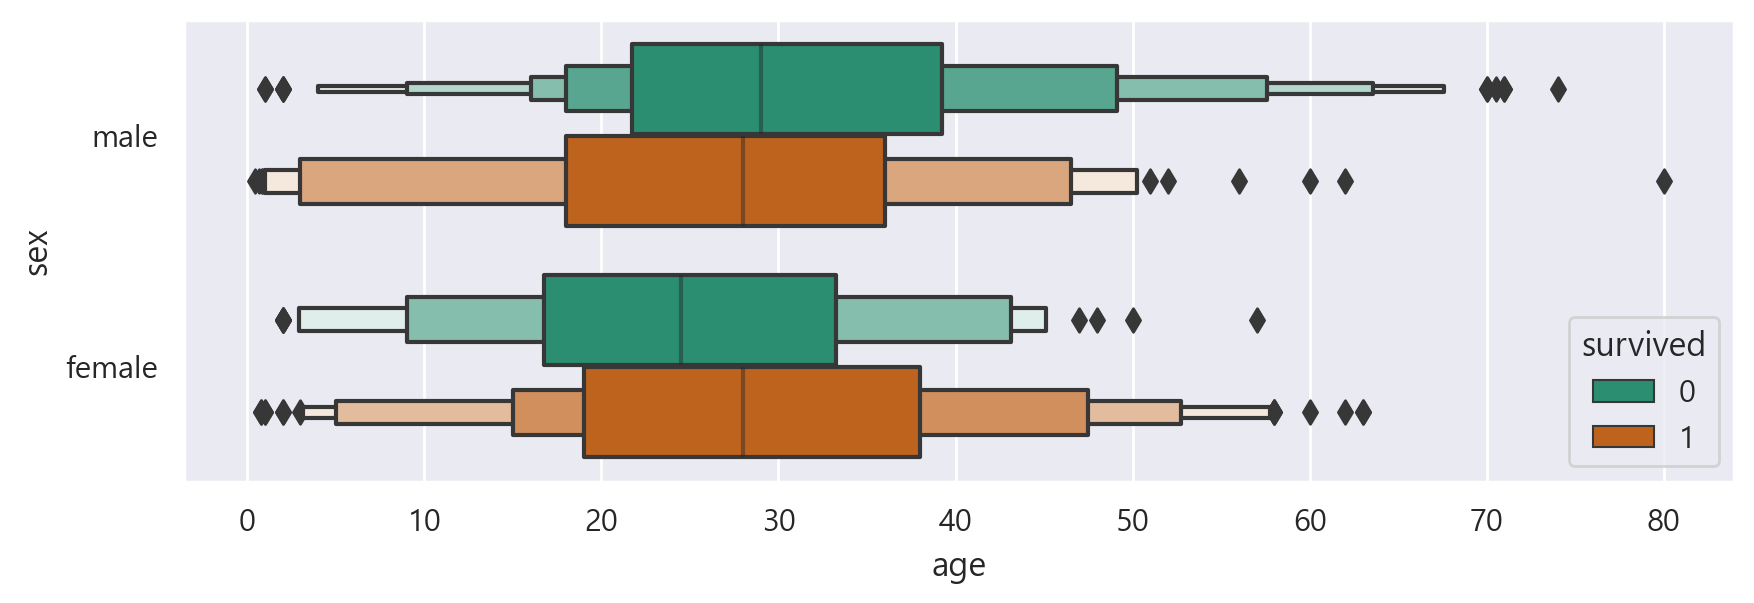

In [114]:
sns.boxenplot(data=titanic, x='age', y='sex', hue='survived')

### 3)쌍관계 그래프
- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatterplot)와 히스토그램을 보여줌

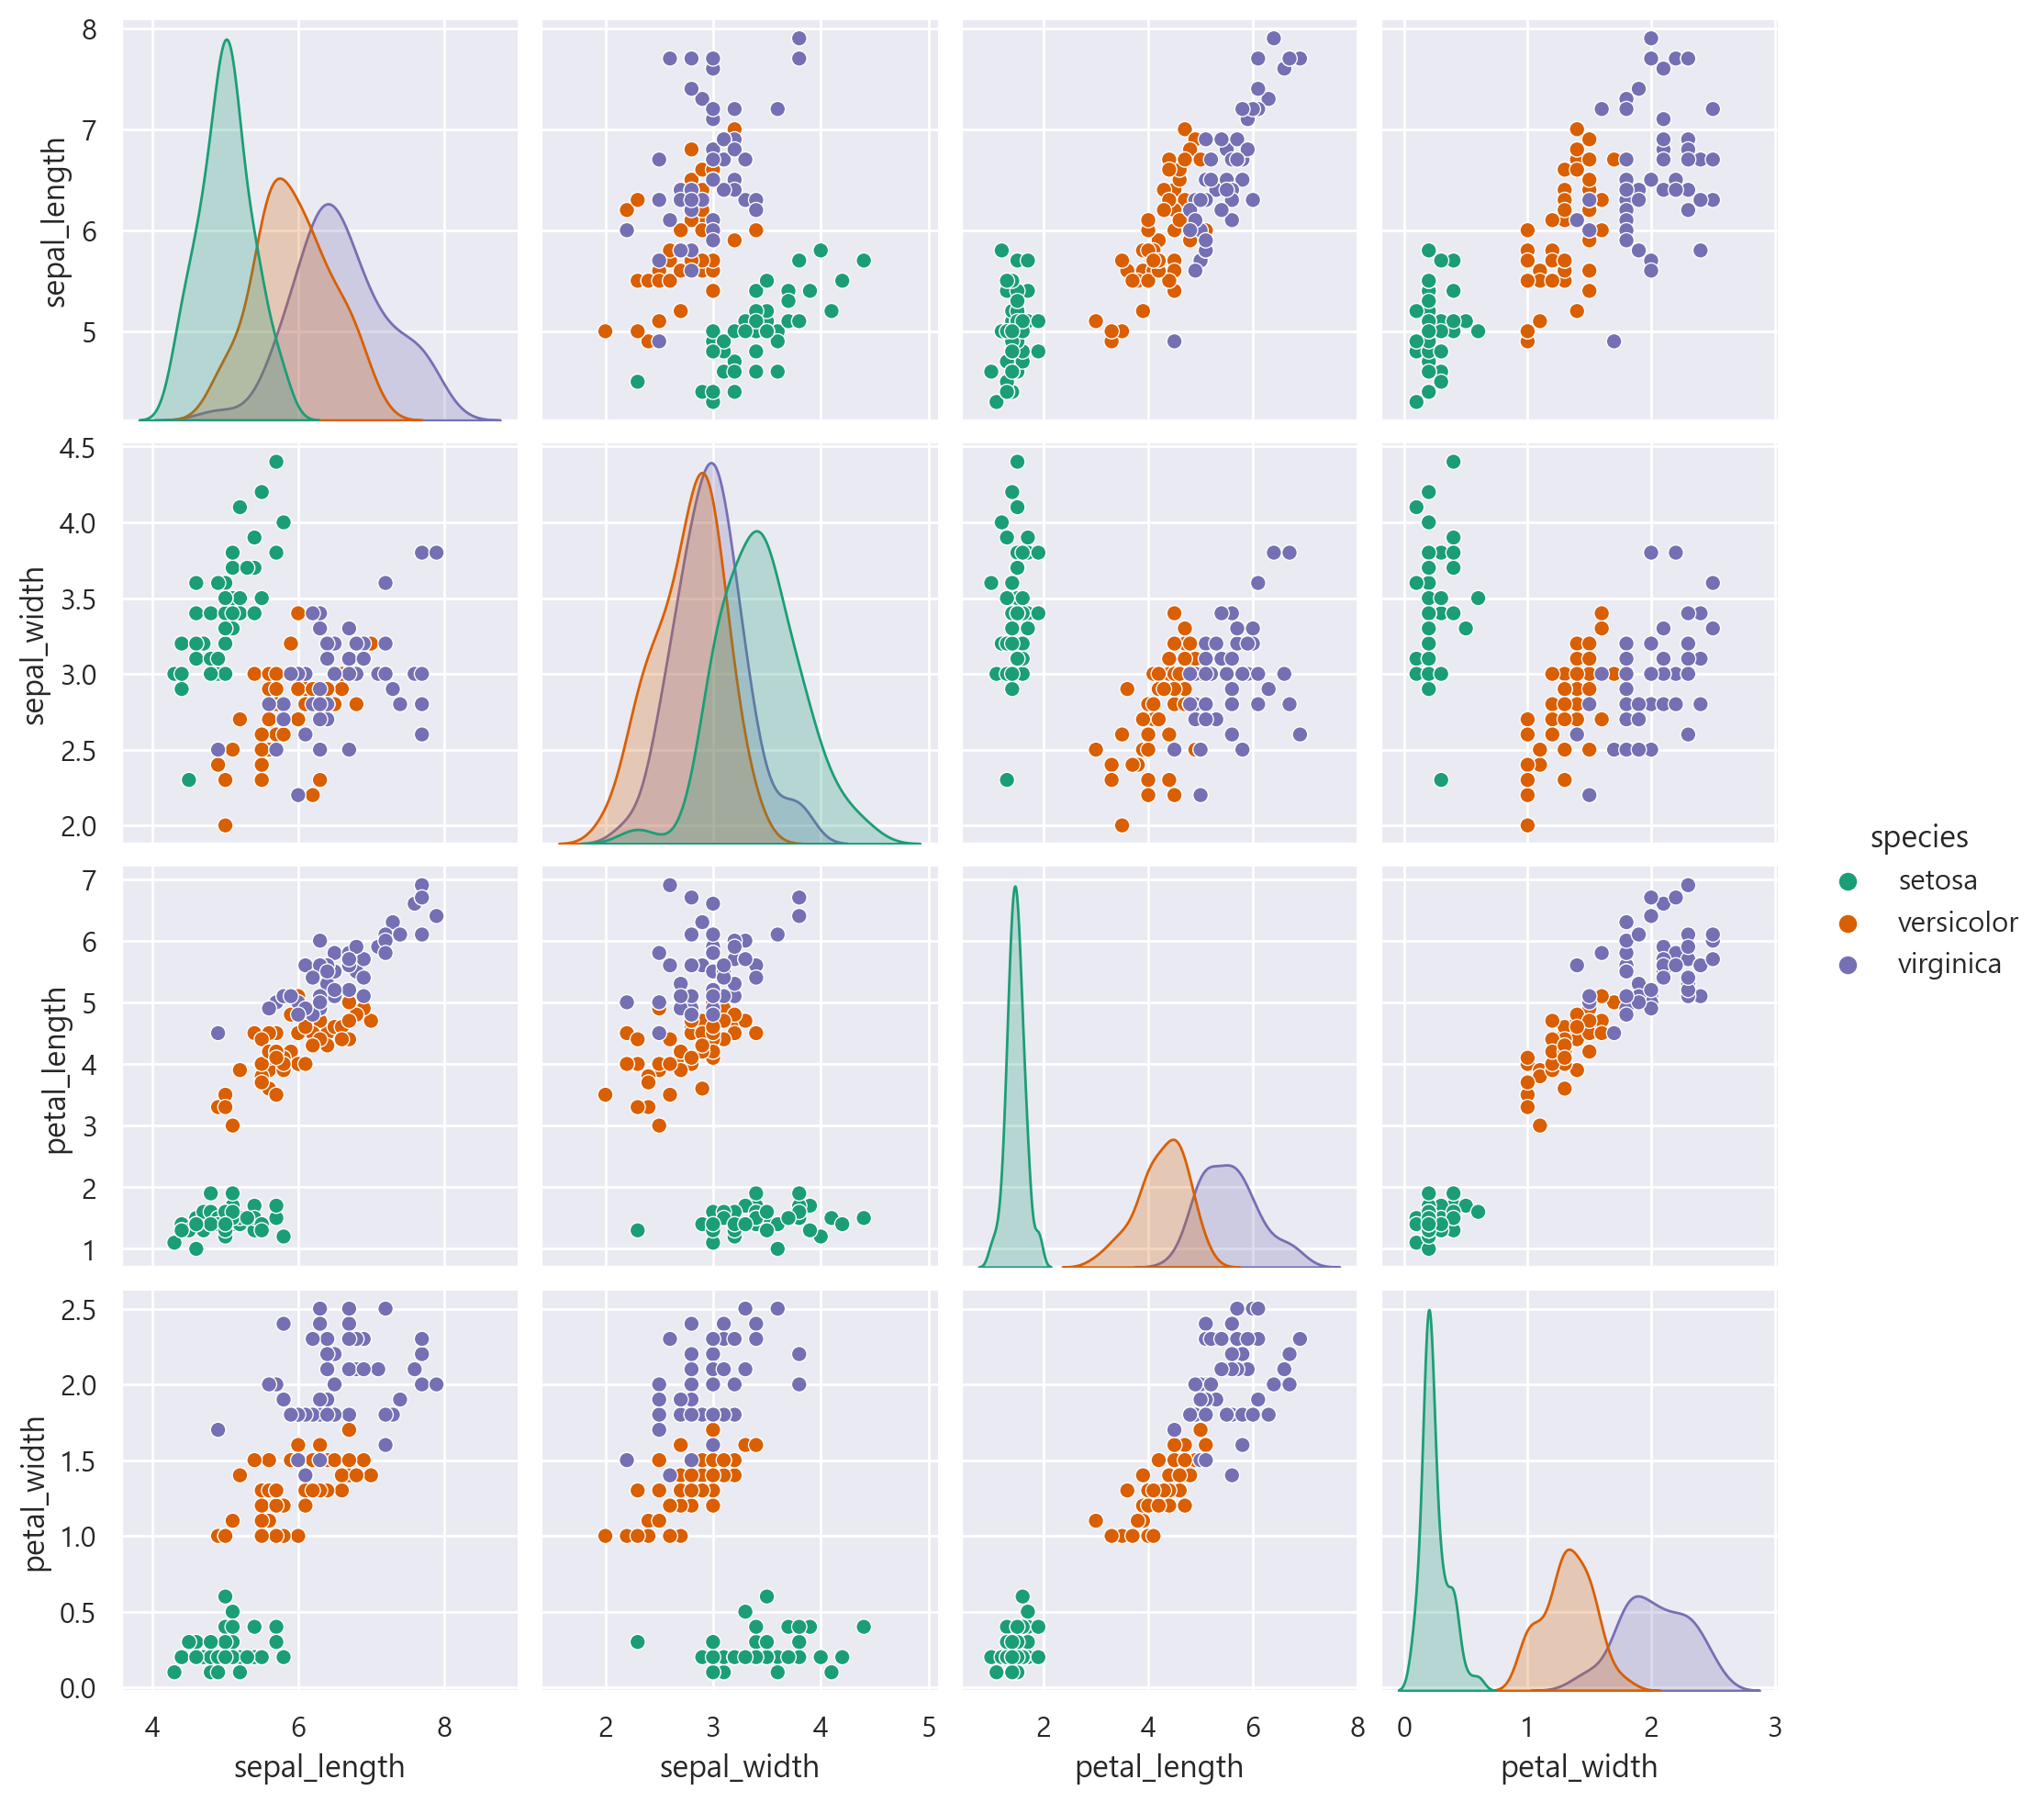

In [117]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도그래프

In [120]:
import numpy as np
x = np.random.randn(10000) # 평균 0, 표준편차1인 정규분포로 1000개 데이터를 배열

<Axes: ylabel='Count'>

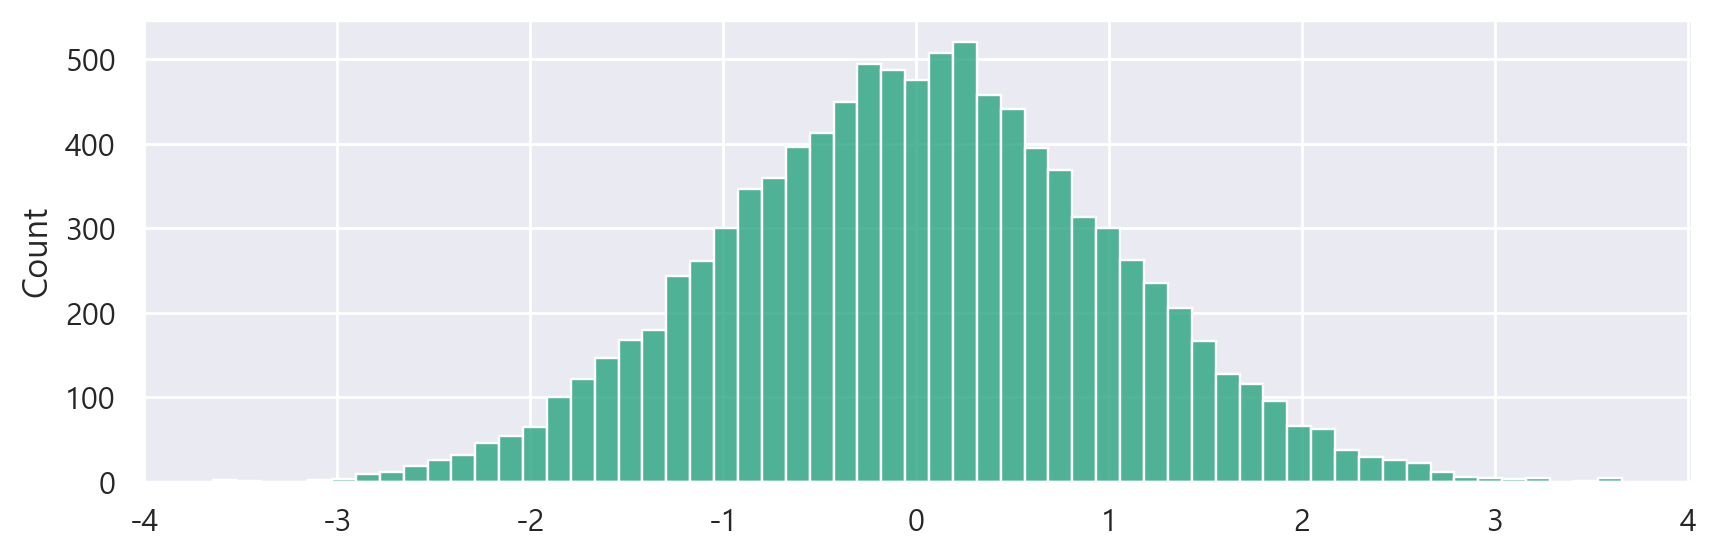

In [122]:
sns.histplot(x, kde=False) # kde(Kernel Density Estimation) = False 는 분포를 매끄럽게

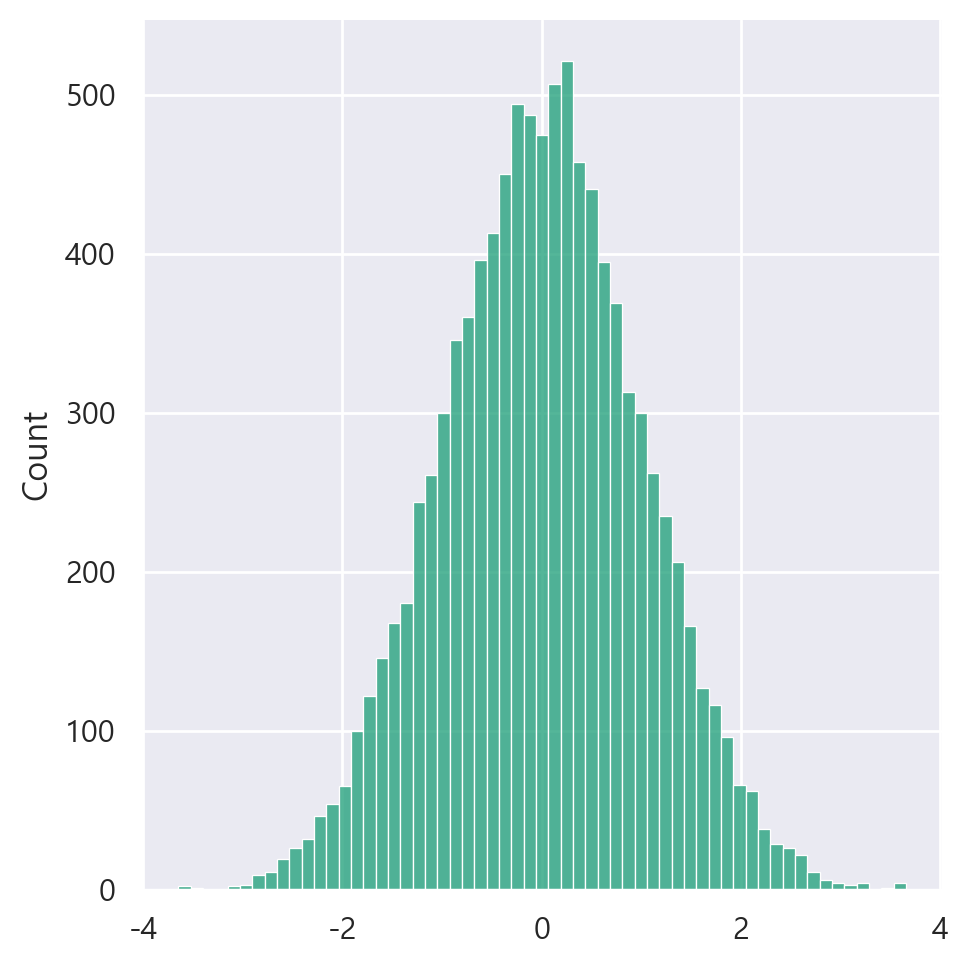

In [123]:
sns.displot(x)

In [127]:
r = iris.corr(numeric_only=True)

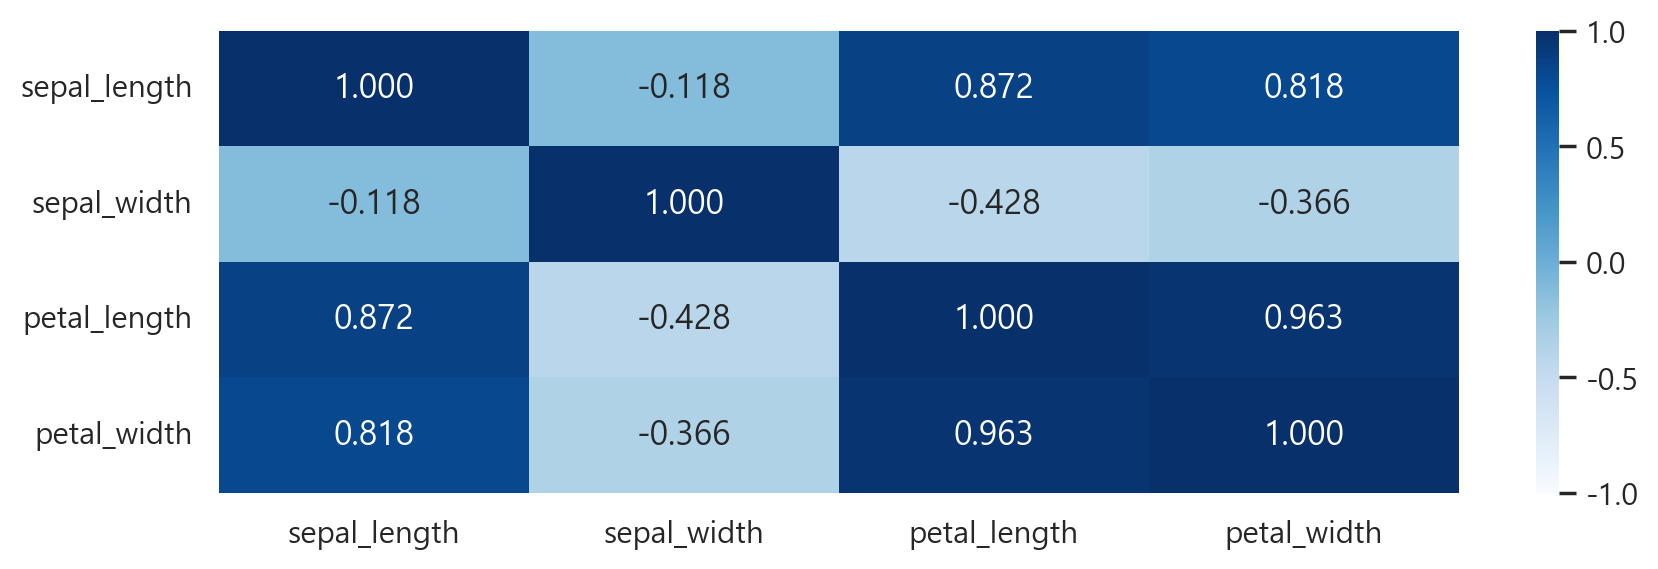

In [134]:
sns.heatmap(r, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Blues')
plt.show()

### 5) 회귀 그래프

<Axes: xlabel='petal_length', ylabel='petal_width'>

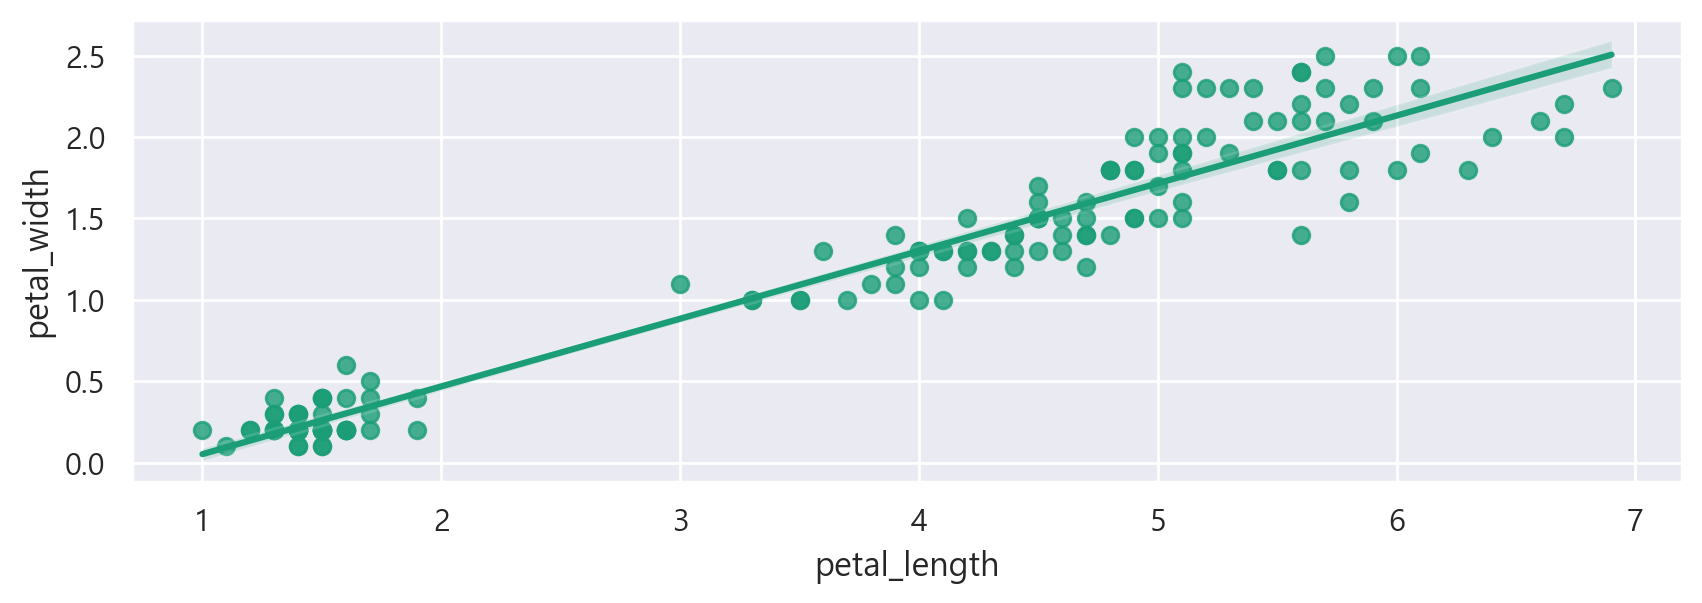

In [135]:
# 회귀그래프 : regplot (hue 사용불가), lmplot(hue사용가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')

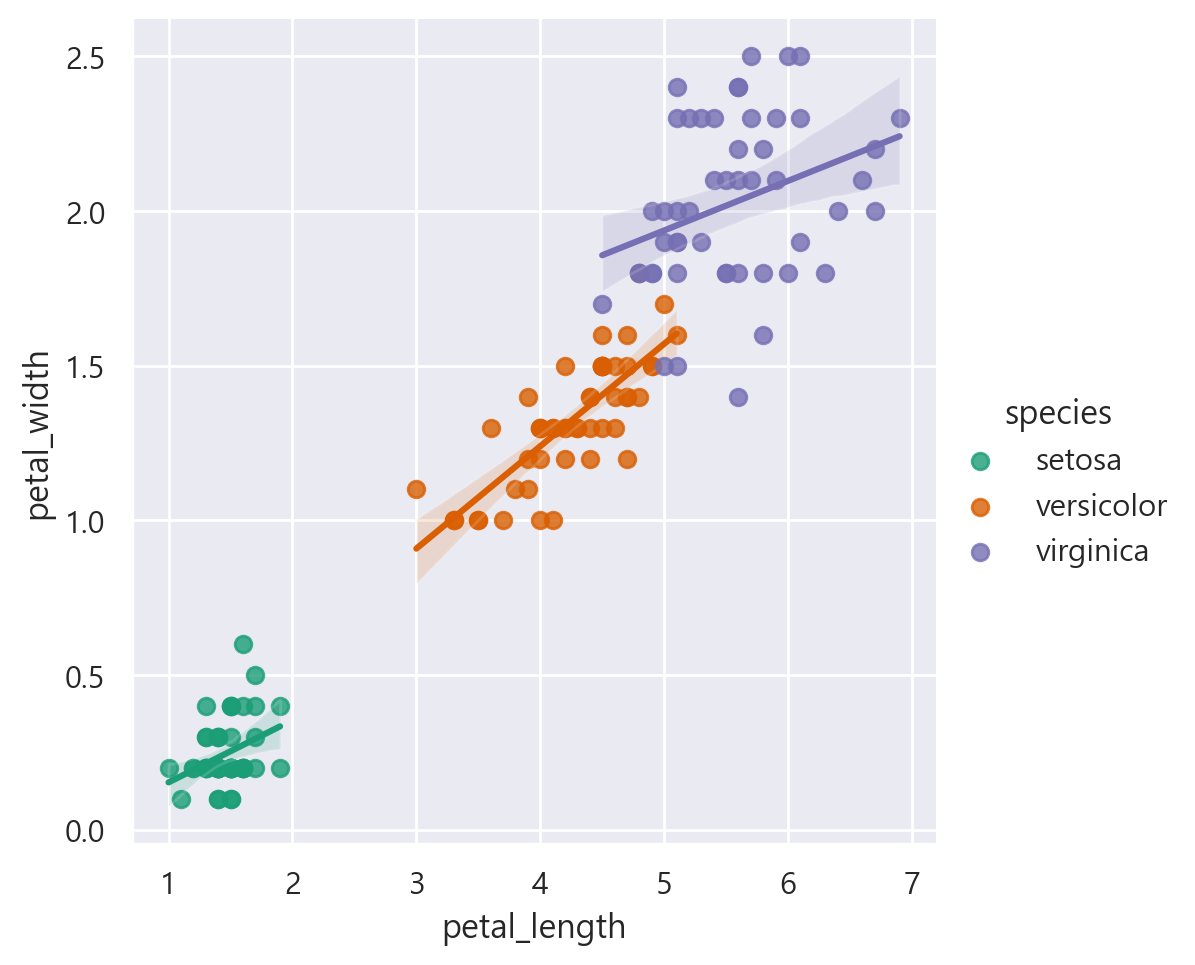

In [138]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

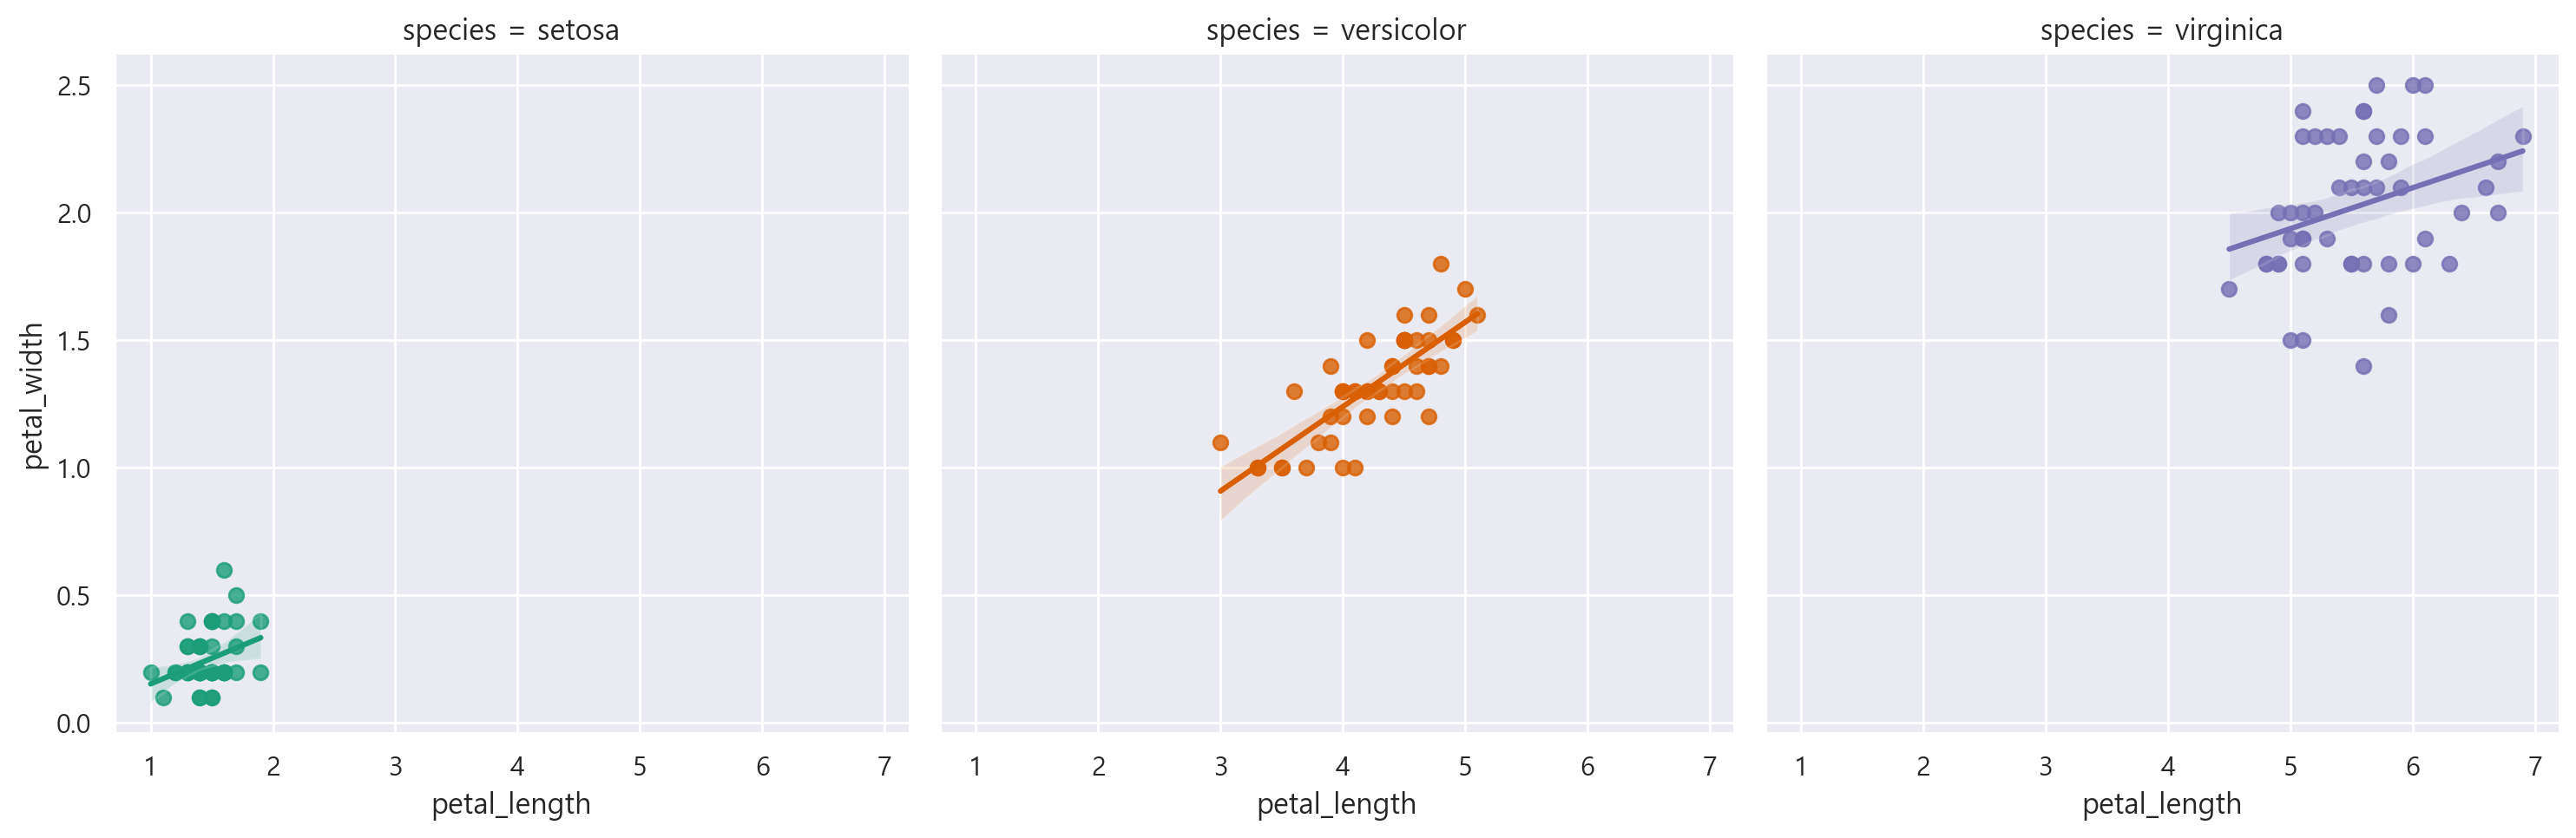

In [141]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
plt.show()

## 4. 다중 그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

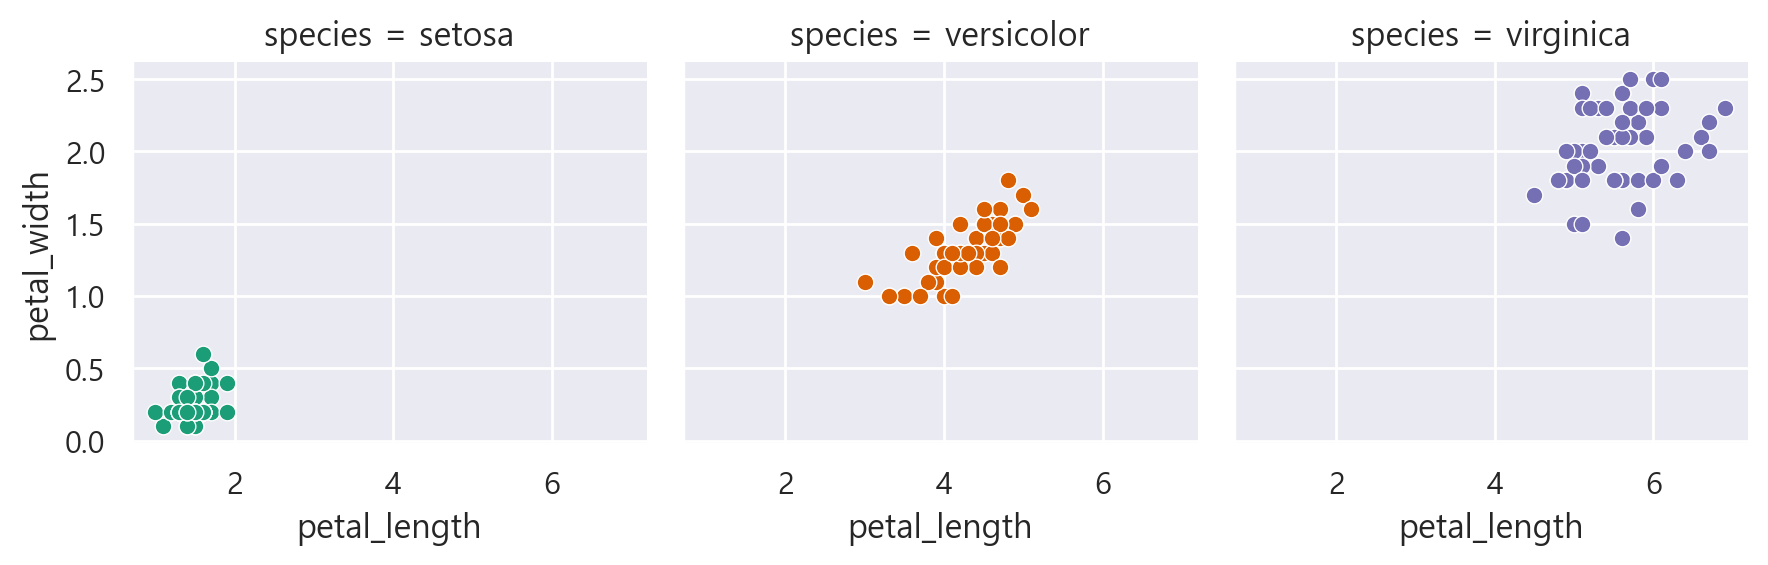

In [144]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.savefig('data/ch13.png')

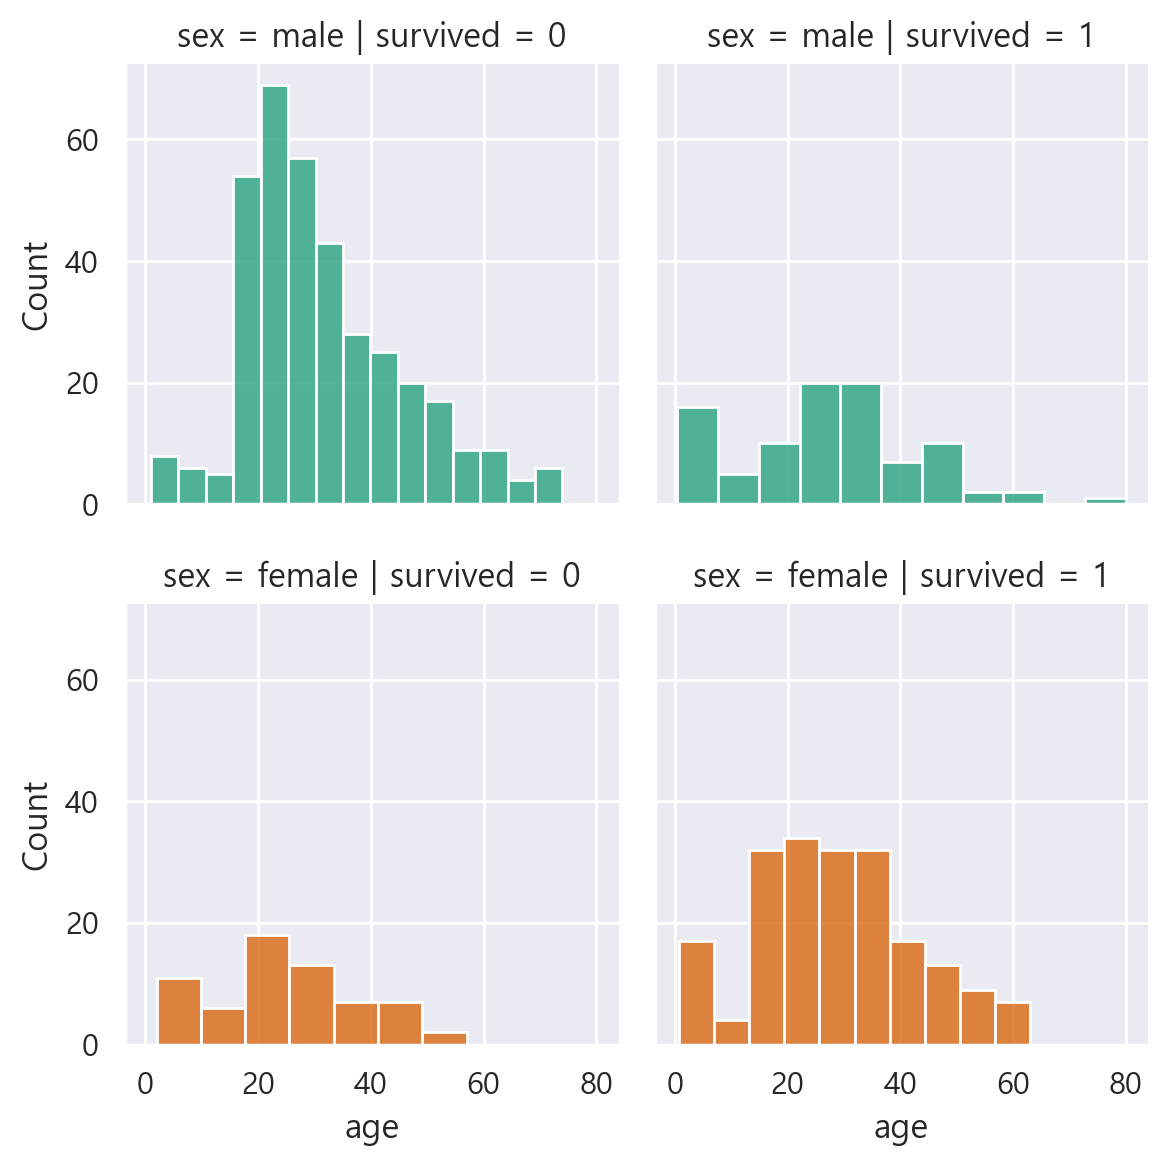

In [146]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age')